# CASA0007 Quantitative Methods Assignment 2

In [138]:
# Load required packages
import sys
print(sys.version)
print(sys.executable)

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

import statsmodels
print(statsmodels.__version__)

3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
/opt/conda/bin/python
0.13.2


In [139]:
# Load data pre_processed
rawdata = pd.read_csv('https://raw.githubusercontent.com/Murphy829/CASA0007_QM_A2/main/Datasets/DataCombinedSortByGender2021.csv')

In [140]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 68 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Gss_code                                             33 non-null     object 
 1   Name                                                 33 non-null     object 
 2   Area_in_square_kilometres                            33 non-null     float64
 3   Pedal_cycles_Collision_Female_count                  33 non-null     int64  
 4   Pedal_cycles_Collision_Male_count                    33 non-null     int64  
 5   Major_principal_roads_length_in_kilometers           33 non-null     float64
 6   Density_of_major_roads                               33 non-null     float64
 7   Minor_roads_length_in_kilometers                     33 non-null     float64
 8   Density_of_minor_roads                               33 non-null     flo

In [141]:
rawdata.head()

,Gss_code,Name,Area_in_square_kilometres,Pedal_cycles_Collision_Female_count,Pedal_cycles_Collision_Male_count,Major_principal_roads_length_in_kilometers,Density_of_major_roads,Minor_roads_length_in_kilometers,Density_of_minor_roads,Total_road_length_in_kilometers,...,NVQ3_percent,Qualifications_NVQ4+_numbers,NVQ4+_denominator,NVQ4+_percent,Qualifications_with_no_qualifications_numbers,With_no_qualifications_denominator,With_no_qualifications_percent,Qualifications_with_other_qualifications_numbers,With_other_qualifications_denominator,With_other_qualifications_percent
0,E09000002,Barking and Dagenham,37.8000,7,41,12.4000,0.3300,43.0000,1.1400,55.4000,...,17.6,51500,139200,37.0000,16600,139200,11.9,13100,139200,9.4
1,E09000003,Barnet,86.7500,16,82,37.3000,0.4300,303.3000,3.5000,340.6000,...,10.2,145200,258800,56.1000,18000,258800,6.9,32100,258800,12.4
2,E09000004,Bexley,64.2900,8,56,97.2000,1.5100,655.6000,10.2000,764.8000,...,17.8,66900,158200,42.3000,11600,158200,7.3,7700,158200,4.9
3,E09000005,Brent,43.2300,18,91,69.4000,1.6100,481.7000,11.1400,551.1000,...,12.7,110900,217700,51.0000,16400,217700,7.5,28400,217700,13.0
4,E09000006,Bromley,150.1300,18,79,55.9000,0.3700,433.3000,2.8900,489.2000,...,13.0,121800,210400,57.9000,9000,210400,4.3,6200,210400,3.0


In [142]:
# Select columns
df = rawdata.loc[:,['Gss_code','Name','Pedal_cycles_Collision_Female_count','Pedal_cycles_Collision_Male_count','Density_of_major_roads','Density_of_minor_roads','Density_of_total_roads','AADF_Pedal_cycles','AADF_All_motor_vehicles','Landuse_proportion_Community_service(2022)','Landuse_proportion_Industry_and_commerce(2022)','Landuse_proportion_Residential(2022)','Landuse_proportion_Transport_and_utilities(2022)','Landuse_proportion_Outdoor_recreation(2022)','Census_Female_count','Census_Male_count','Census_age_over65','Census_Population_Density','Median_house_price_indec','Gross_annual_pay_meidan','Job_density(2020)','NVQ4+_percent']]

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Gss_code                                          33 non-null     object 
 1   Name                                              33 non-null     object 
 2   Pedal_cycles_Collision_Female_count               33 non-null     int64  
 3   Pedal_cycles_Collision_Male_count                 33 non-null     int64  
 4   Density_of_major_roads                            33 non-null     float64
 5   Density_of_minor_roads                            33 non-null     float64
 6   Density_of_total_roads                            33 non-null     float64
 7   AADF_Pedal_cycles                                 33 non-null     int64  
 8   AADF_All_motor_vehicles                           33 non-null     int64  
 9   Landuse_proportion_Comm

In [144]:
# No null value
df.isnull().sum()

Gss_code                                            0
Name                                                0
Pedal_cycles_Collision_Female_count                 0
Pedal_cycles_Collision_Male_count                   0
Density_of_major_roads                              0
Density_of_minor_roads                              0
Density_of_total_roads                              0
AADF_Pedal_cycles                                   0
AADF_All_motor_vehicles                             0
Landuse_proportion_Community_service(2022)          0
Landuse_proportion_Industry_and_commerce(2022)      0
Landuse_proportion_Residential(2022)                0
Landuse_proportion_Transport_and_utilities(2022)    0
Landuse_proportion_Outdoor_recreation(2022)         0
Census_Female_count                                 0
Census_Male_count                                   0
Census_age_over65                                   0
Census_Population_Density                           0
Median_house_price_indec    

In [145]:
# Change columns names
df.columns = ['Code','Name','CFemale','CMale','DMainRd','DMinorRd','DTotalRd','AADFCycles','AADFMotor','LCommunity','LIndustry','LResidential','LTransport','LOutdoor','Female','Male','Age65+','DPopulation','MedianHousePrice','MedianAnnualPay','DJob','NVQ4']

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              33 non-null     object 
 1   Name              33 non-null     object 
 2   CFemale           33 non-null     int64  
 3   CMale             33 non-null     int64  
 4   DMainRd           33 non-null     float64
 5   DMinorRd          33 non-null     float64
 6   DTotalRd          33 non-null     float64
 7   AADFCycles        33 non-null     int64  
 8   AADFMotor         33 non-null     int64  
 9   LCommunity        33 non-null     float64
 10  LIndustry         33 non-null     float64
 11  LResidential      33 non-null     float64
 12  LTransport        33 non-null     float64
 13  LOutdoor          33 non-null     float64
 14  Female            33 non-null     int64  
 15  Male              33 non-null     int64  
 16  Age65+            33 non-null     int64  
 17 

In [147]:
df.isnull().sum()

Code                0
Name                0
CFemale             0
CMale               0
DMainRd             0
DMinorRd            0
DTotalRd            0
AADFCycles          0
AADFMotor           0
LCommunity          0
LIndustry           0
LResidential        0
LTransport          0
LOutdoor            0
Female              0
Male                0
Age65+              0
DPopulation         0
MedianHousePrice    0
MedianAnnualPay     0
DJob                0
NVQ4                0
dtype: int64

In [148]:
df.describe()

,CFemale,CMale,DMainRd,DMinorRd,DTotalRd,AADFCycles,AADFMotor,LCommunity,LIndustry,LResidential,LTransport,LOutdoor,Female,Male,Age65+,DPopulation,MedianHousePrice,MedianAnnualPay,DJob,NVQ4
count,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000
mean,36.6364,125.4545,1.7409,11.9067,13.6715,"45,908.8485","1,299,199.5758",5.2909,3.1236,12.8055,19.0318,13.3473,"137,321.8788","129,336.5152","29,561.4848","7,290.9515","567,210.6061",9.5152,3.4003,59.9394
std,30.1598,83.2590,2.0478,12.9116,14.9095,"52,257.5396","492,537.0665",1.3045,3.1409,4.4461,5.3596,6.8377,"40,115.0537","38,770.4456","11,595.1694","3,670.8903","176,072.3940",9.3866,14.4317,11.6282
min,4.0000,38.0000,0.3300,1.1400,1.4700,"3,145.0000","358,299.0000",2.8000,0.5300,5.8700,10.3200,2.4100,"3,861.0000","4,722.0000","1,117.0000","2,197.7000","340,000.0000",5.4000,0.3900,37.0000
25%,14.0000,67.0000,0.9800,8.0500,8.9900,"8,910.0000","942,402.0000",4.4100,1.4100,9.6900,14.7100,10.2200,"110,652.0000","103,298.0000","23,057.0000","4,512.1000","462,500.0000",6.1000,0.5700,52.0000
50%,27.0000,100.0000,1.3100,9.6000,10.9200,"19,572.0000","1,345,460.0000",5.0500,2.3700,11.7600,18.5200,12.1600,"141,951.0000","136,474.0000","26,500.0000","6,108.6000","534,000.0000",7.4000,0.6900,57.9000
75%,53.0000,145.0000,1.8800,11.3500,13.0700,"68,066.0000","1,546,454.0000",5.7500,3.7300,15.9300,22.8700,14.8500,"163,713.0000","155,253.0000","37,684.0000","9,640.9000","590,000.0000",9.3000,1.0300,67.1000
max,113.0000,341.0000,12.2600,76.2700,88.5200,"194,628.0000","2,811,584.0000",8.9100,18.1000,23.3200,32.0600,40.9900,"203,086.0000","188,545.0000","55,132.0000","15,702.9000","1,250,000.0000",60.0000,83.7100,94.4000


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


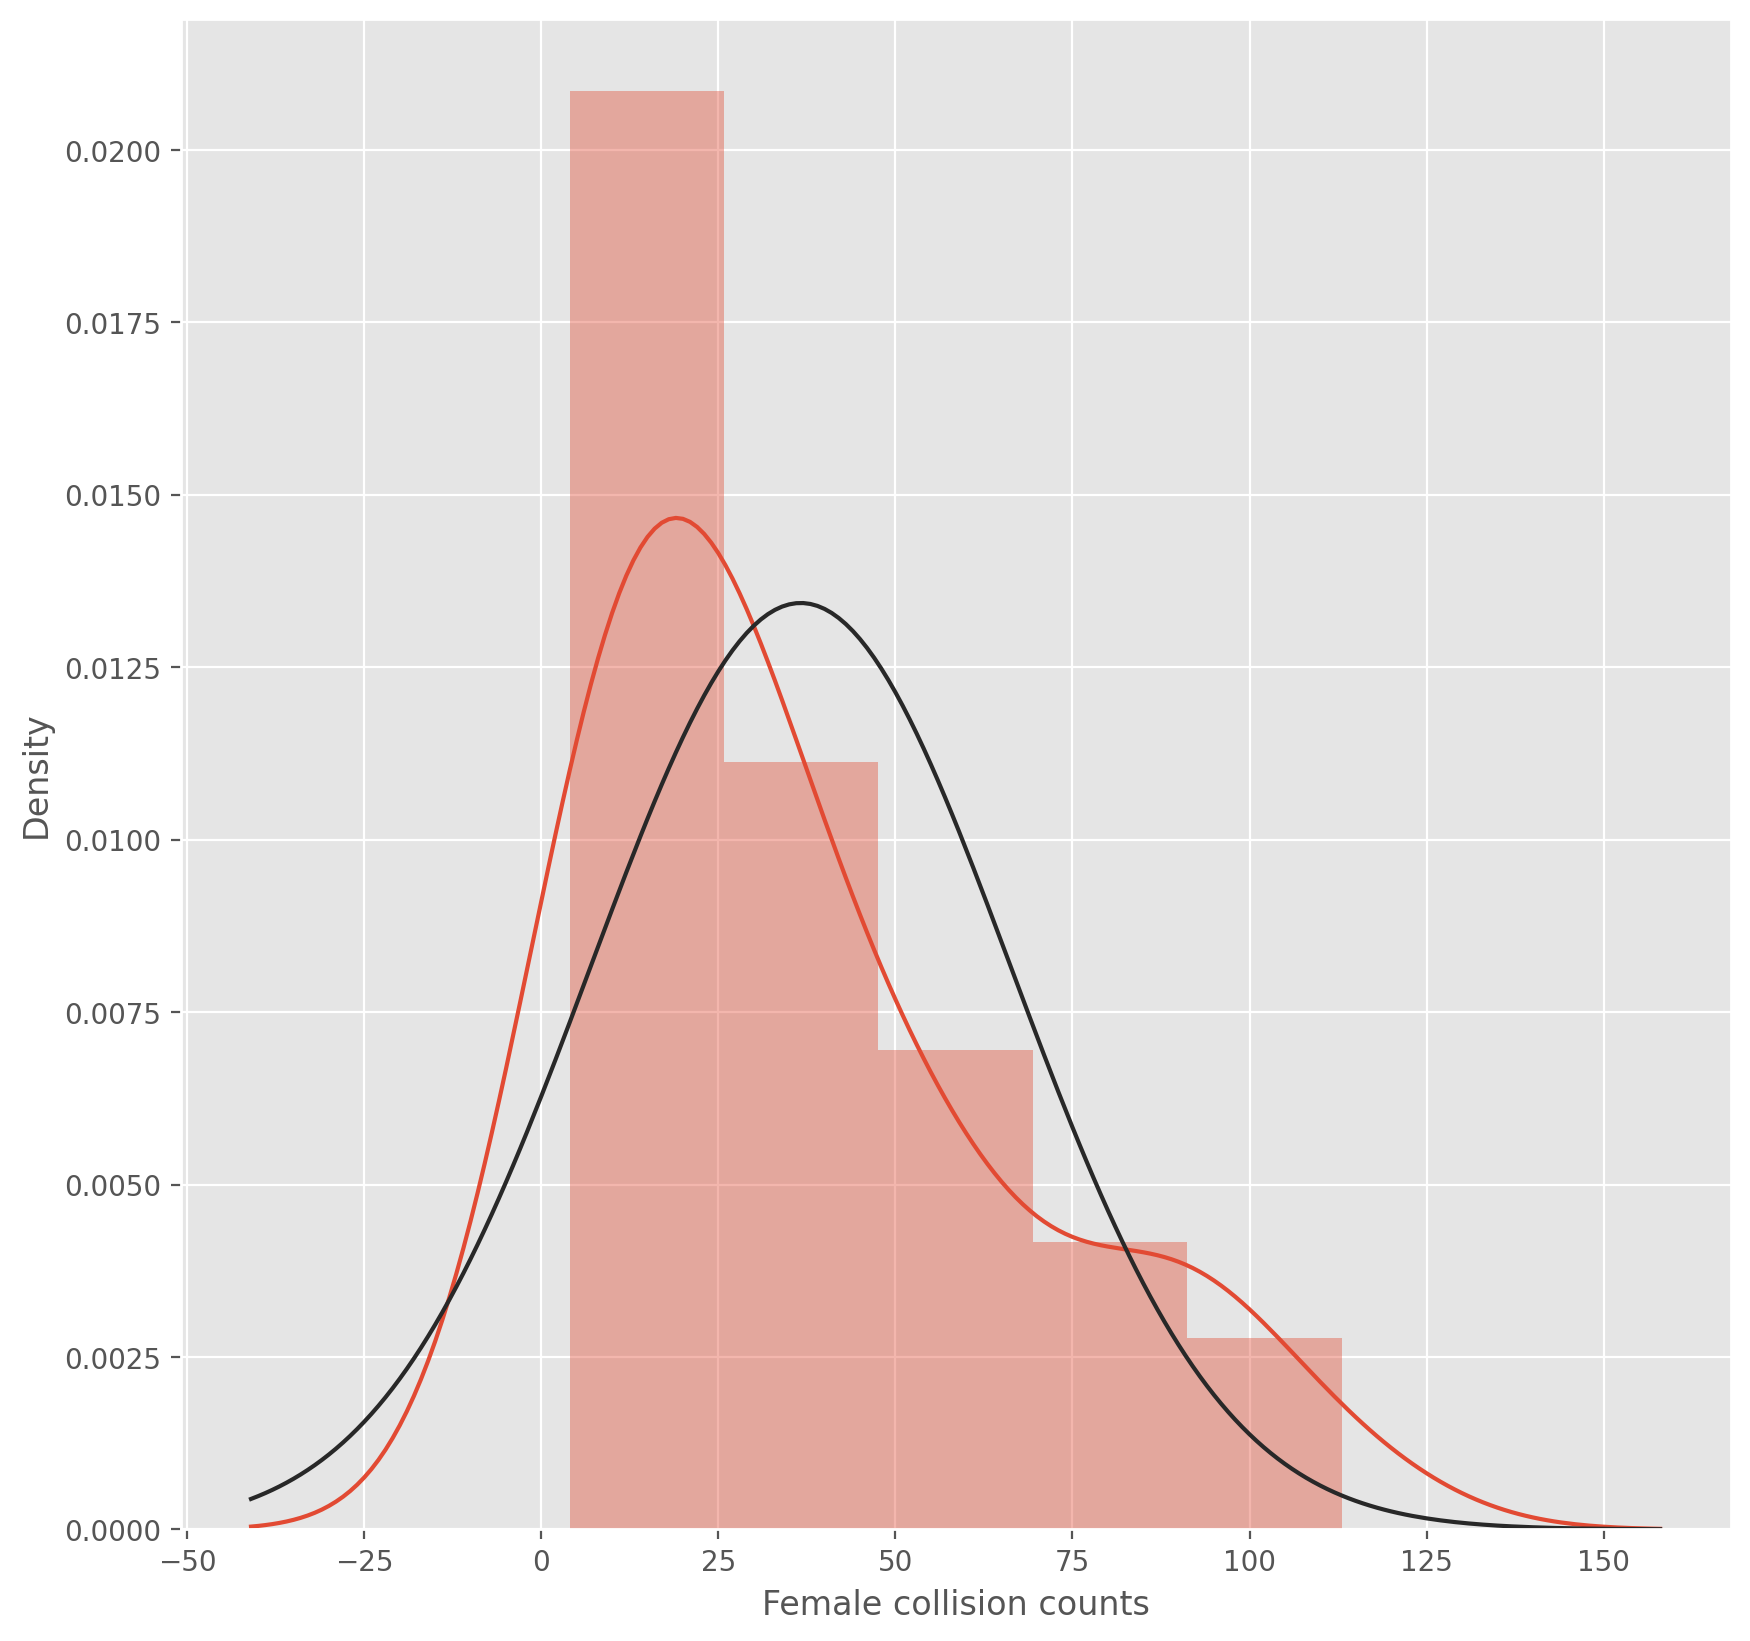

In [234]:
# Dispot
plt.figure(figsize=(10,10),dpi=200)
sn.distplot(df['CFemale'], fit=norm)
plt.xlabel('Female collision counts')
plt.ylabel('Density')
plt.savefig("Female_collision_counts_vs_Density.png", bbox_inches = 'tight')

In [45]:
print("Skewness: %f" % df['CFemale'].skew())
print("Kurtosis: %f" % df['CFemale'].kurt())

Skewness: 1.038391
Kurtosis: 0.118456


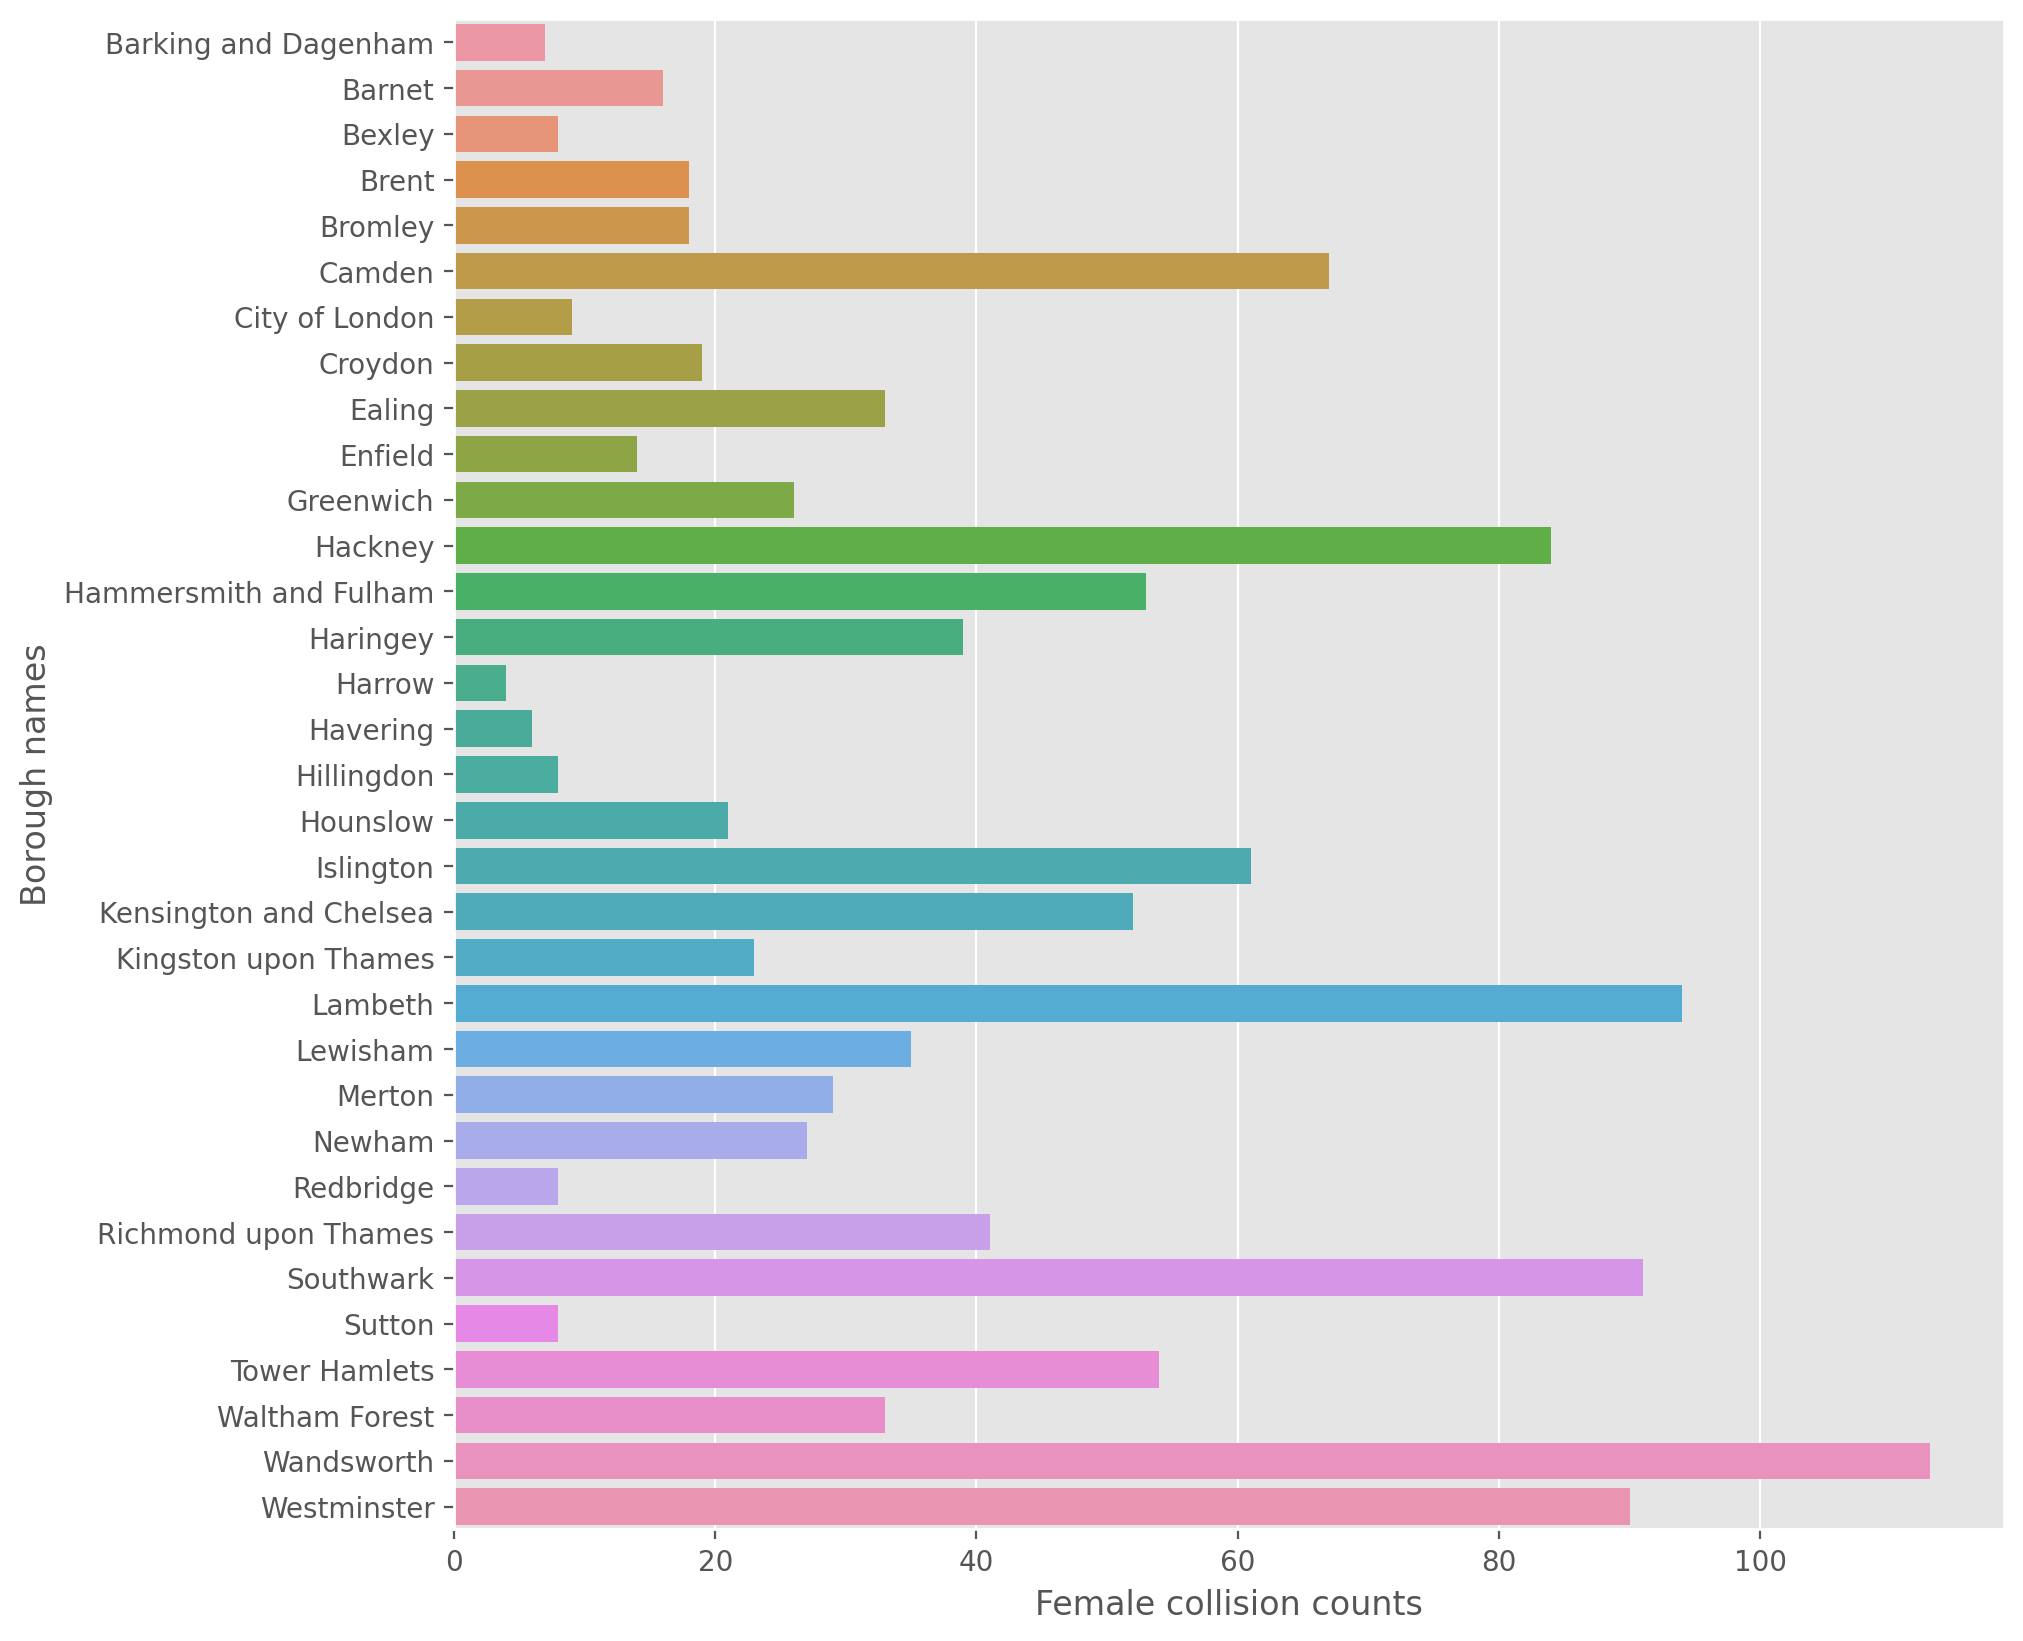

In [232]:
plt.figure(figsize=(10,10),dpi=200)
sn.barplot(x="CFemale", y="Name", data=df)
plt.yticks(rotation=0, fontsize=10)
plt.xlabel('Female collision counts')
plt.ylabel('Borough names')
plt.savefig("Female_collision_counts_per_borough_barchart.png", bbox_inches = 'tight')

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


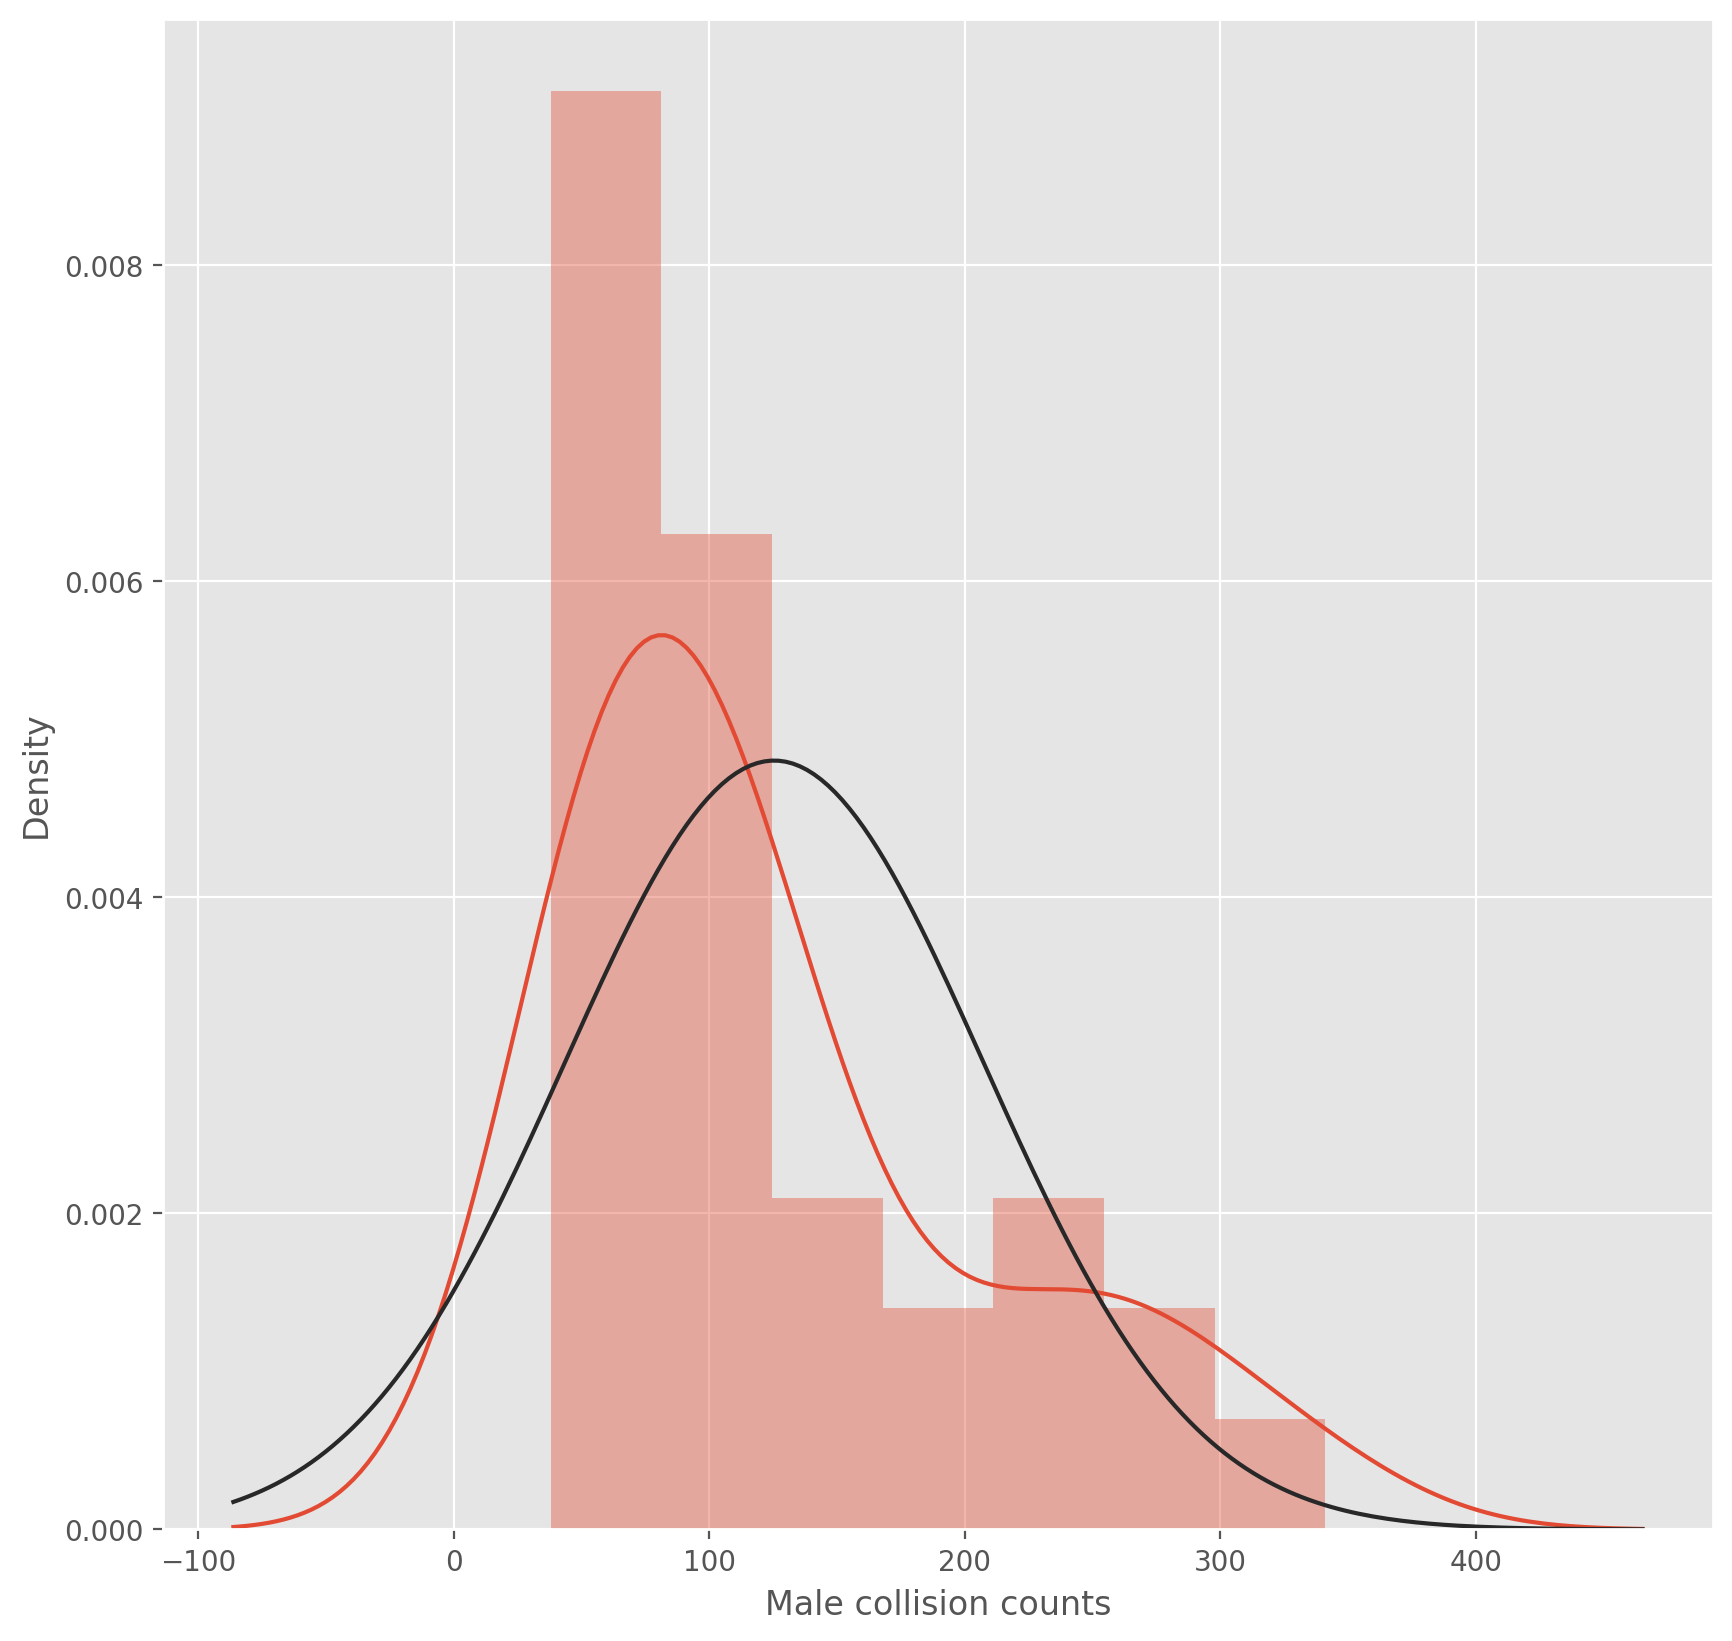

In [235]:
plt.figure(figsize=(10,10),dpi=200)
sn.distplot(df['CMale'], fit=norm)
plt.xlabel('Male collision counts')
plt.ylabel('Density')
plt.savefig("Male_collision_counts_vs_Density.png", bbox_inches = 'tight')

In [46]:
print("Skewness: %f" % df['CMale'].skew())
print("Kurtosis: %f" % df['CMale'].kurt())

Skewness: 1.162358
Kurtosis: 0.371478


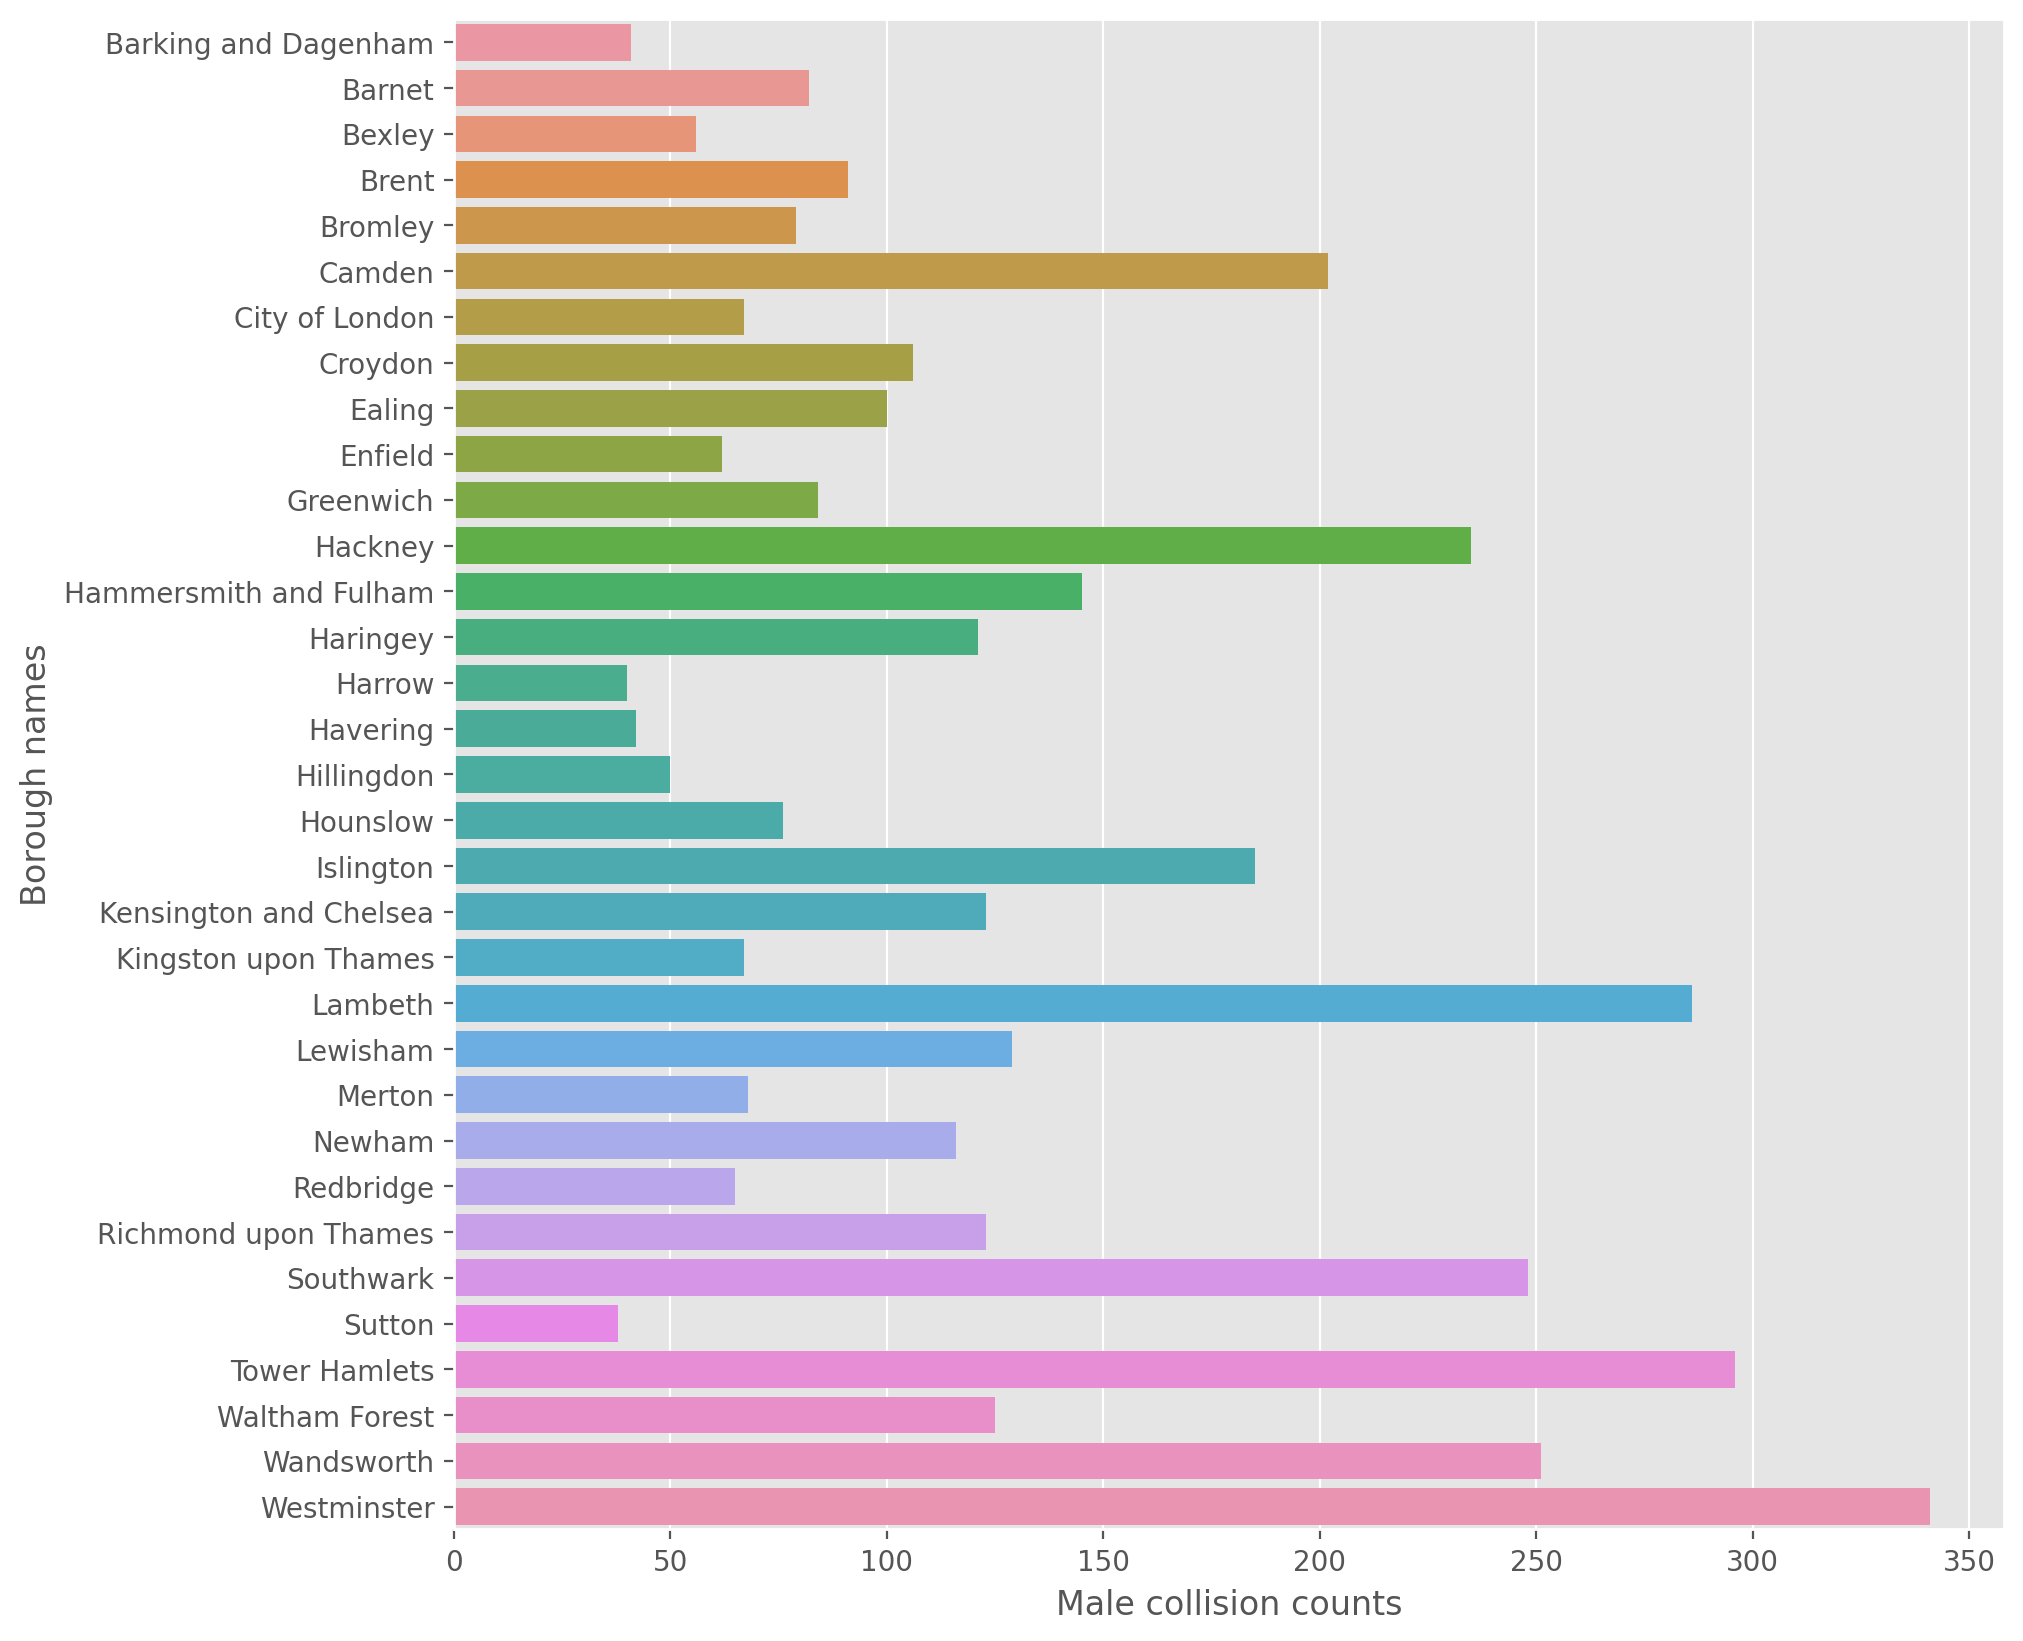

In [233]:
plt.figure(figsize=(10,10),dpi=200)
sn.barplot(x="CMale", y="Name", data=df)
plt.yticks(rotation=0, fontsize=10)
plt.xlabel('Male collision counts')
plt.ylabel('Borough names')
plt.savefig("Male_collision_counts_per_borough_barchart.png", bbox_inches = 'tight')

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DMainRd', ylabel='Density'>

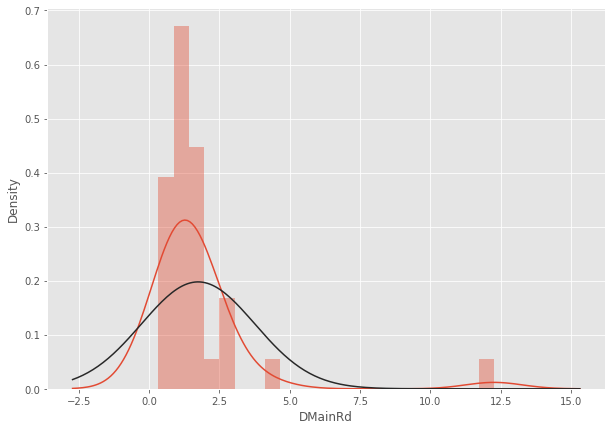

In [58]:
plt.figure(figsize=(10,7))
sn.distplot(df['DMainRd'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DMinorRd', ylabel='Density'>

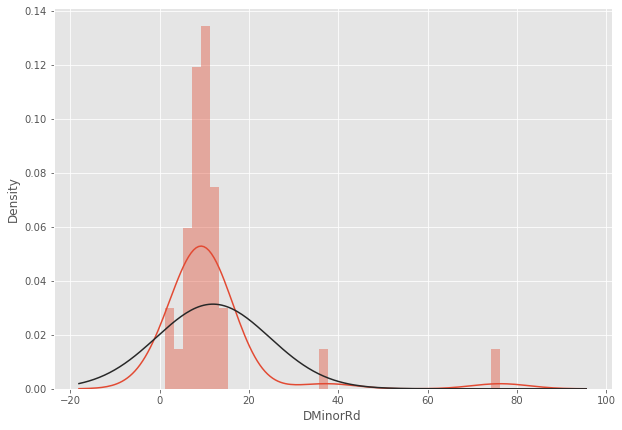

In [59]:
plt.figure(figsize=(10,7))
sn.distplot(df['DMinorRd'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DTotalRd', ylabel='Density'>

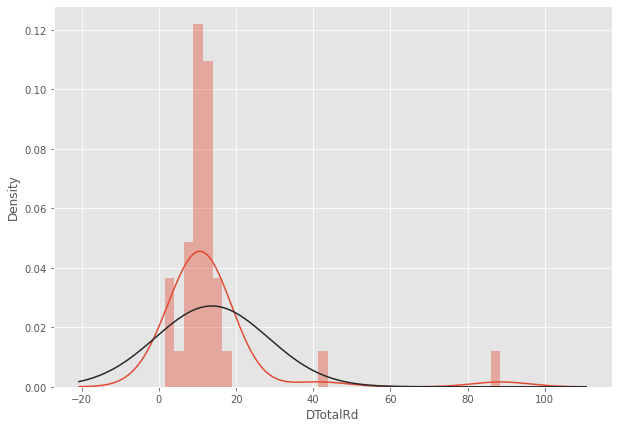

In [60]:
plt.figure(figsize=(10,7))
sn.distplot(df['DTotalRd'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AADFCycles', ylabel='Density'>

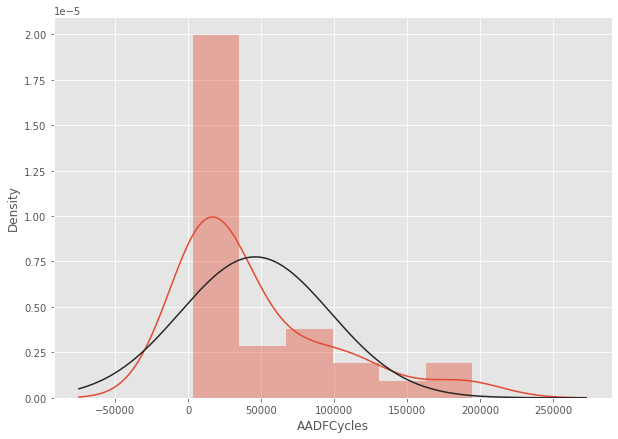

In [61]:
plt.figure(figsize=(10,7))
sn.distplot(df['AADFCycles'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AADFMotor', ylabel='Density'>

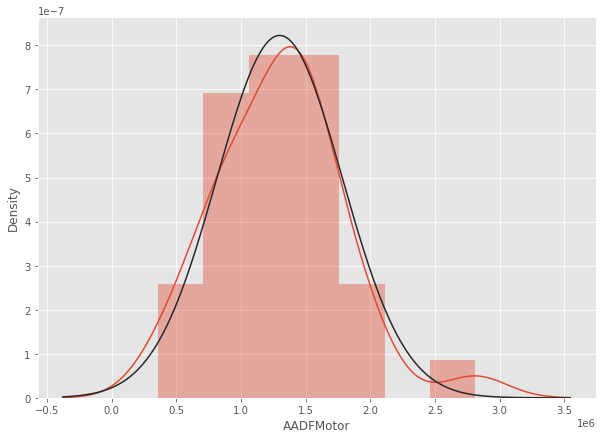

In [62]:
plt.figure(figsize=(10,7))
sn.distplot(df['AADFMotor'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LCommunity', ylabel='Density'>

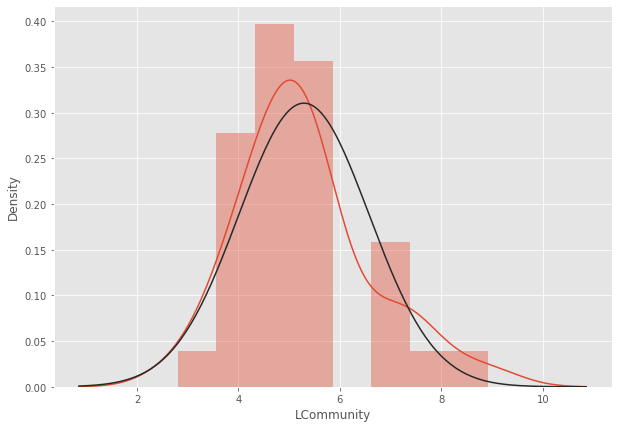

In [63]:
plt.figure(figsize=(10,7))
sn.distplot(df['LCommunity'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIndustry', ylabel='Density'>

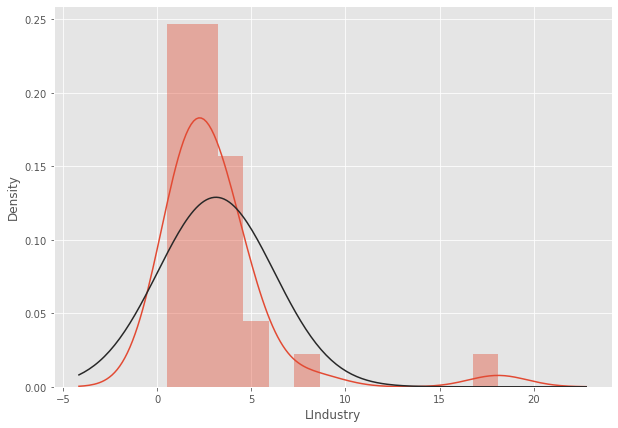

In [64]:
plt.figure(figsize=(10,7))
sn.distplot(df['LIndustry'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LResidential', ylabel='Density'>

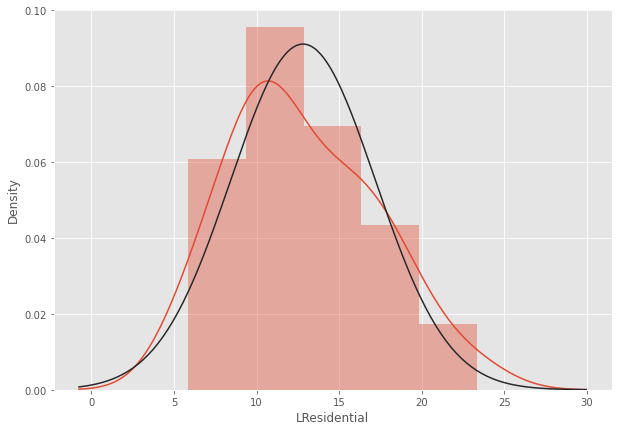

In [65]:
plt.figure(figsize=(10,7))
sn.distplot(df['LResidential'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTransport', ylabel='Density'>

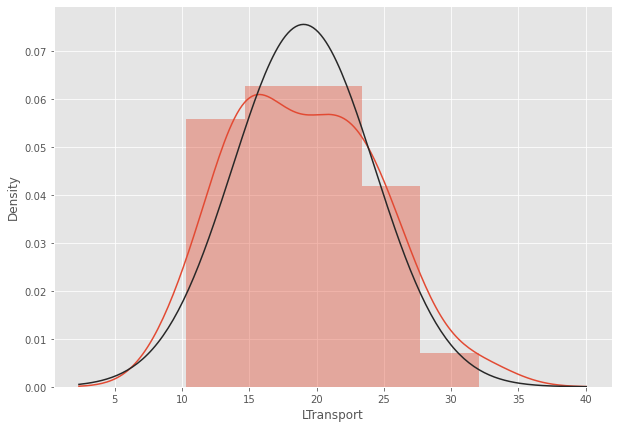

In [66]:
plt.figure(figsize=(10,7))
sn.distplot(df['LTransport'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOutdoor', ylabel='Density'>

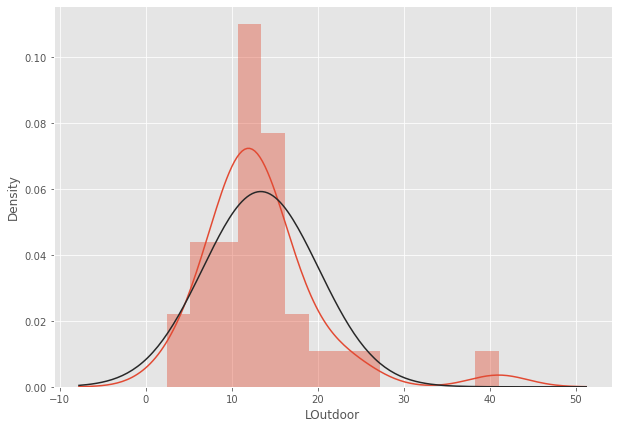

In [67]:
plt.figure(figsize=(10,7))
sn.distplot(df['LOutdoor'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Female', ylabel='Density'>

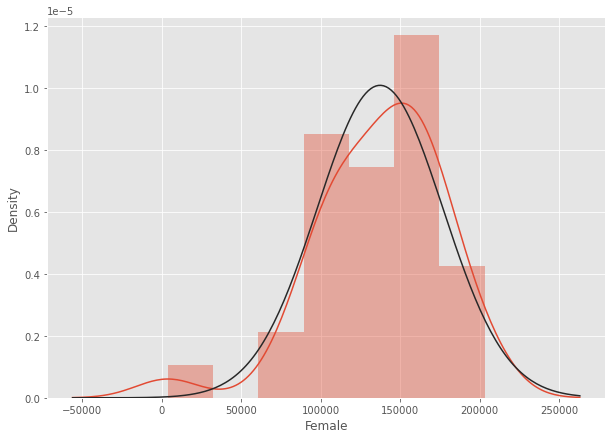

In [68]:
plt.figure(figsize=(10,7))
sn.distplot(df['Female'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Male', ylabel='Density'>

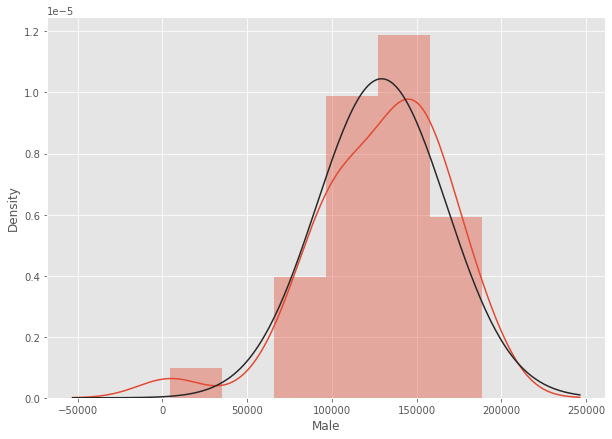

In [69]:
plt.figure(figsize=(10,7))
sn.distplot(df['Male'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age65+', ylabel='Density'>

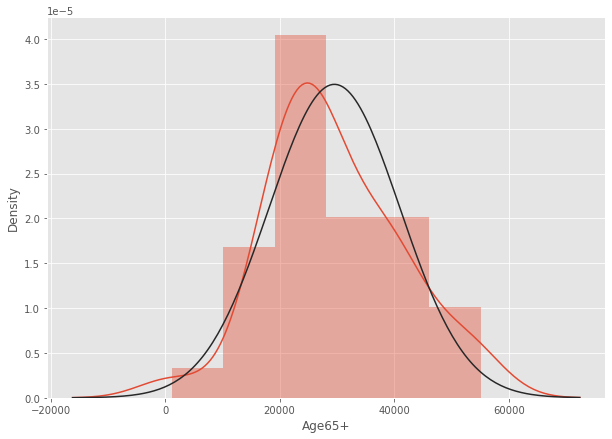

In [70]:
plt.figure(figsize=(10,7))
sn.distplot(df['Age65+'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DPopulation', ylabel='Density'>

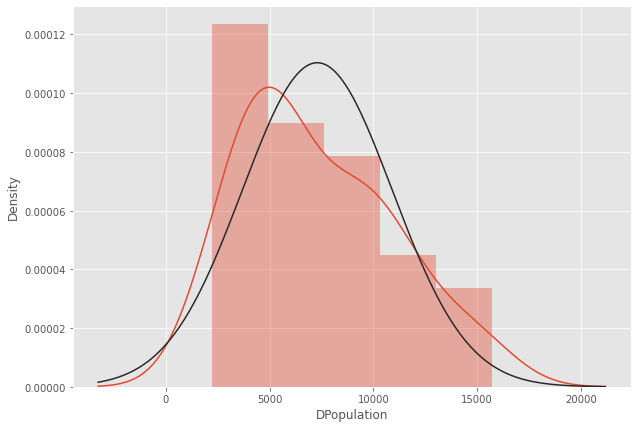

In [71]:
plt.figure(figsize=(10,7))
sn.distplot(df['DPopulation'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedianHousePrice', ylabel='Density'>

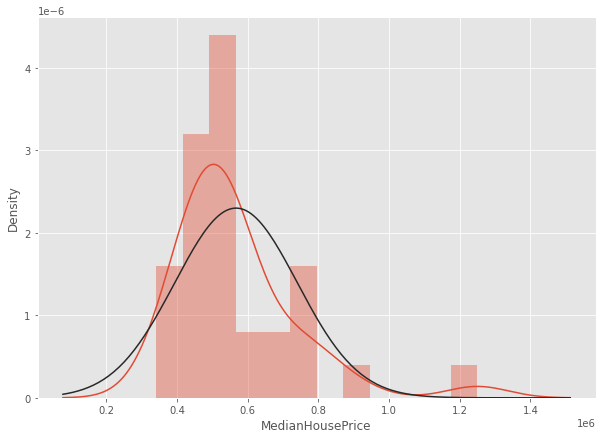

In [72]:
plt.figure(figsize=(10,7))
sn.distplot(df['MedianHousePrice'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedianAnnualPay', ylabel='Density'>

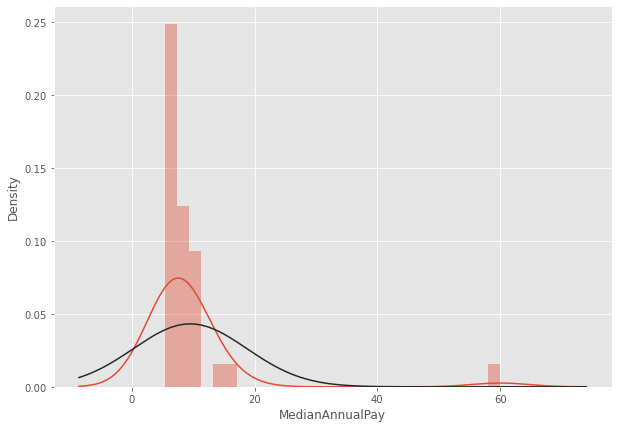

In [73]:
plt.figure(figsize=(10,7))
sn.distplot(df['MedianAnnualPay'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DJob', ylabel='Density'>

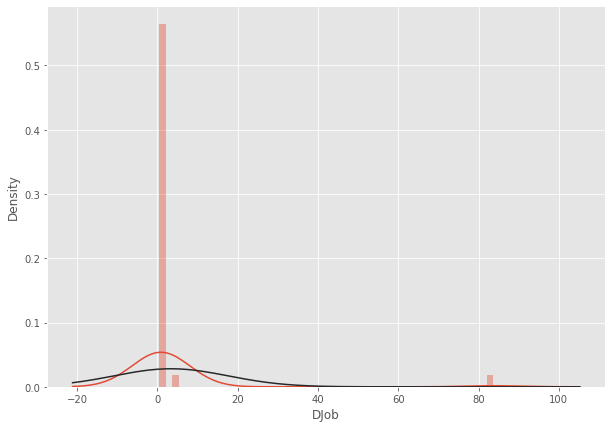

In [74]:
plt.figure(figsize=(10,7))
sn.distplot(df['DJob'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AADFMotor', ylabel='Density'>

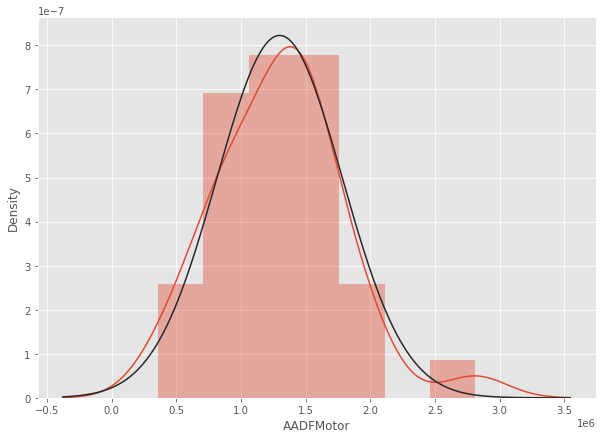

In [75]:
plt.figure(figsize=(10,7))
sn.distplot(df['AADFMotor'], fit=norm)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NVQ4', ylabel='Density'>

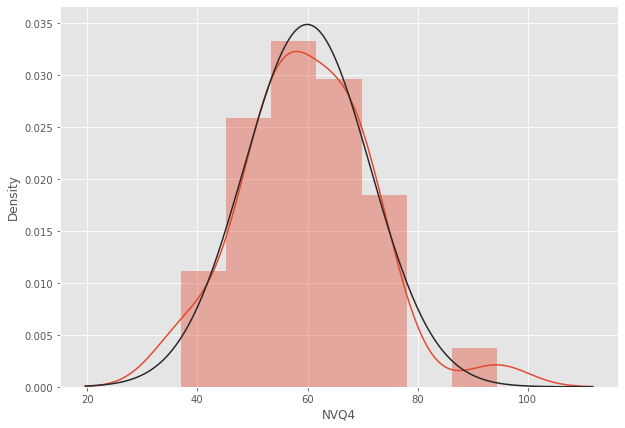

In [76]:
plt.figure(figsize=(10,7))
sn.distplot(df['NVQ4'], fit=norm)

In [149]:
# Normalizaiton
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df.drop(['Code','Name'],axis=1))
 
df_minmax  = pd.DataFrame(df_minmax)



In [151]:
# Change columns names
df_minmax.columns = ['CFemale','CMale','DMainRd','DMinorRd','DTotalRd','AADFCycles','AADFMotor','LCommunity','LIndustry','LResidential','LTransport','LOutdoor','Female','Male','Age65+','DPopulation','MedianHousePrice','MedianAnnualPay','DJob','NVQ4']

In [152]:
df_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CFemale           33 non-null     float64
 1   CMale             33 non-null     float64
 2   DMainRd           33 non-null     float64
 3   DMinorRd          33 non-null     float64
 4   DTotalRd          33 non-null     float64
 5   AADFCycles        33 non-null     float64
 6   AADFMotor         33 non-null     float64
 7   LCommunity        33 non-null     float64
 8   LIndustry         33 non-null     float64
 9   LResidential      33 non-null     float64
 10  LTransport        33 non-null     float64
 11  LOutdoor          33 non-null     float64
 12  Female            33 non-null     float64
 13  Male              33 non-null     float64
 14  Age65+            33 non-null     float64
 15  DPopulation       33 non-null     float64
 16  MedianHousePrice  33 non-null     float64
 17 

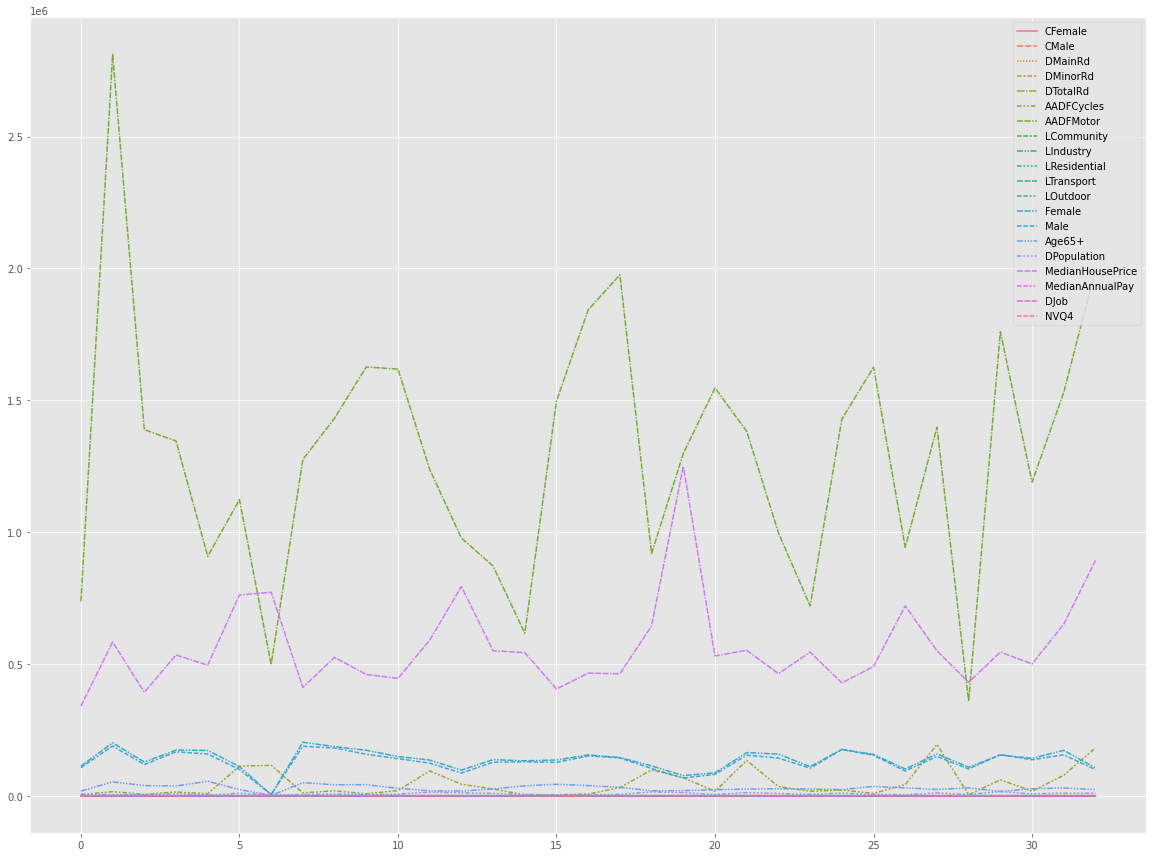

In [155]:
# Line plots
plt.figure(figsize=(20,15))
sn.lineplot(data=df)
plt.show()

In [157]:
# Line plots
# plt.figure(figsize=(20,15))
# sn.lineplot(data=df_minmax)
# plt.show()

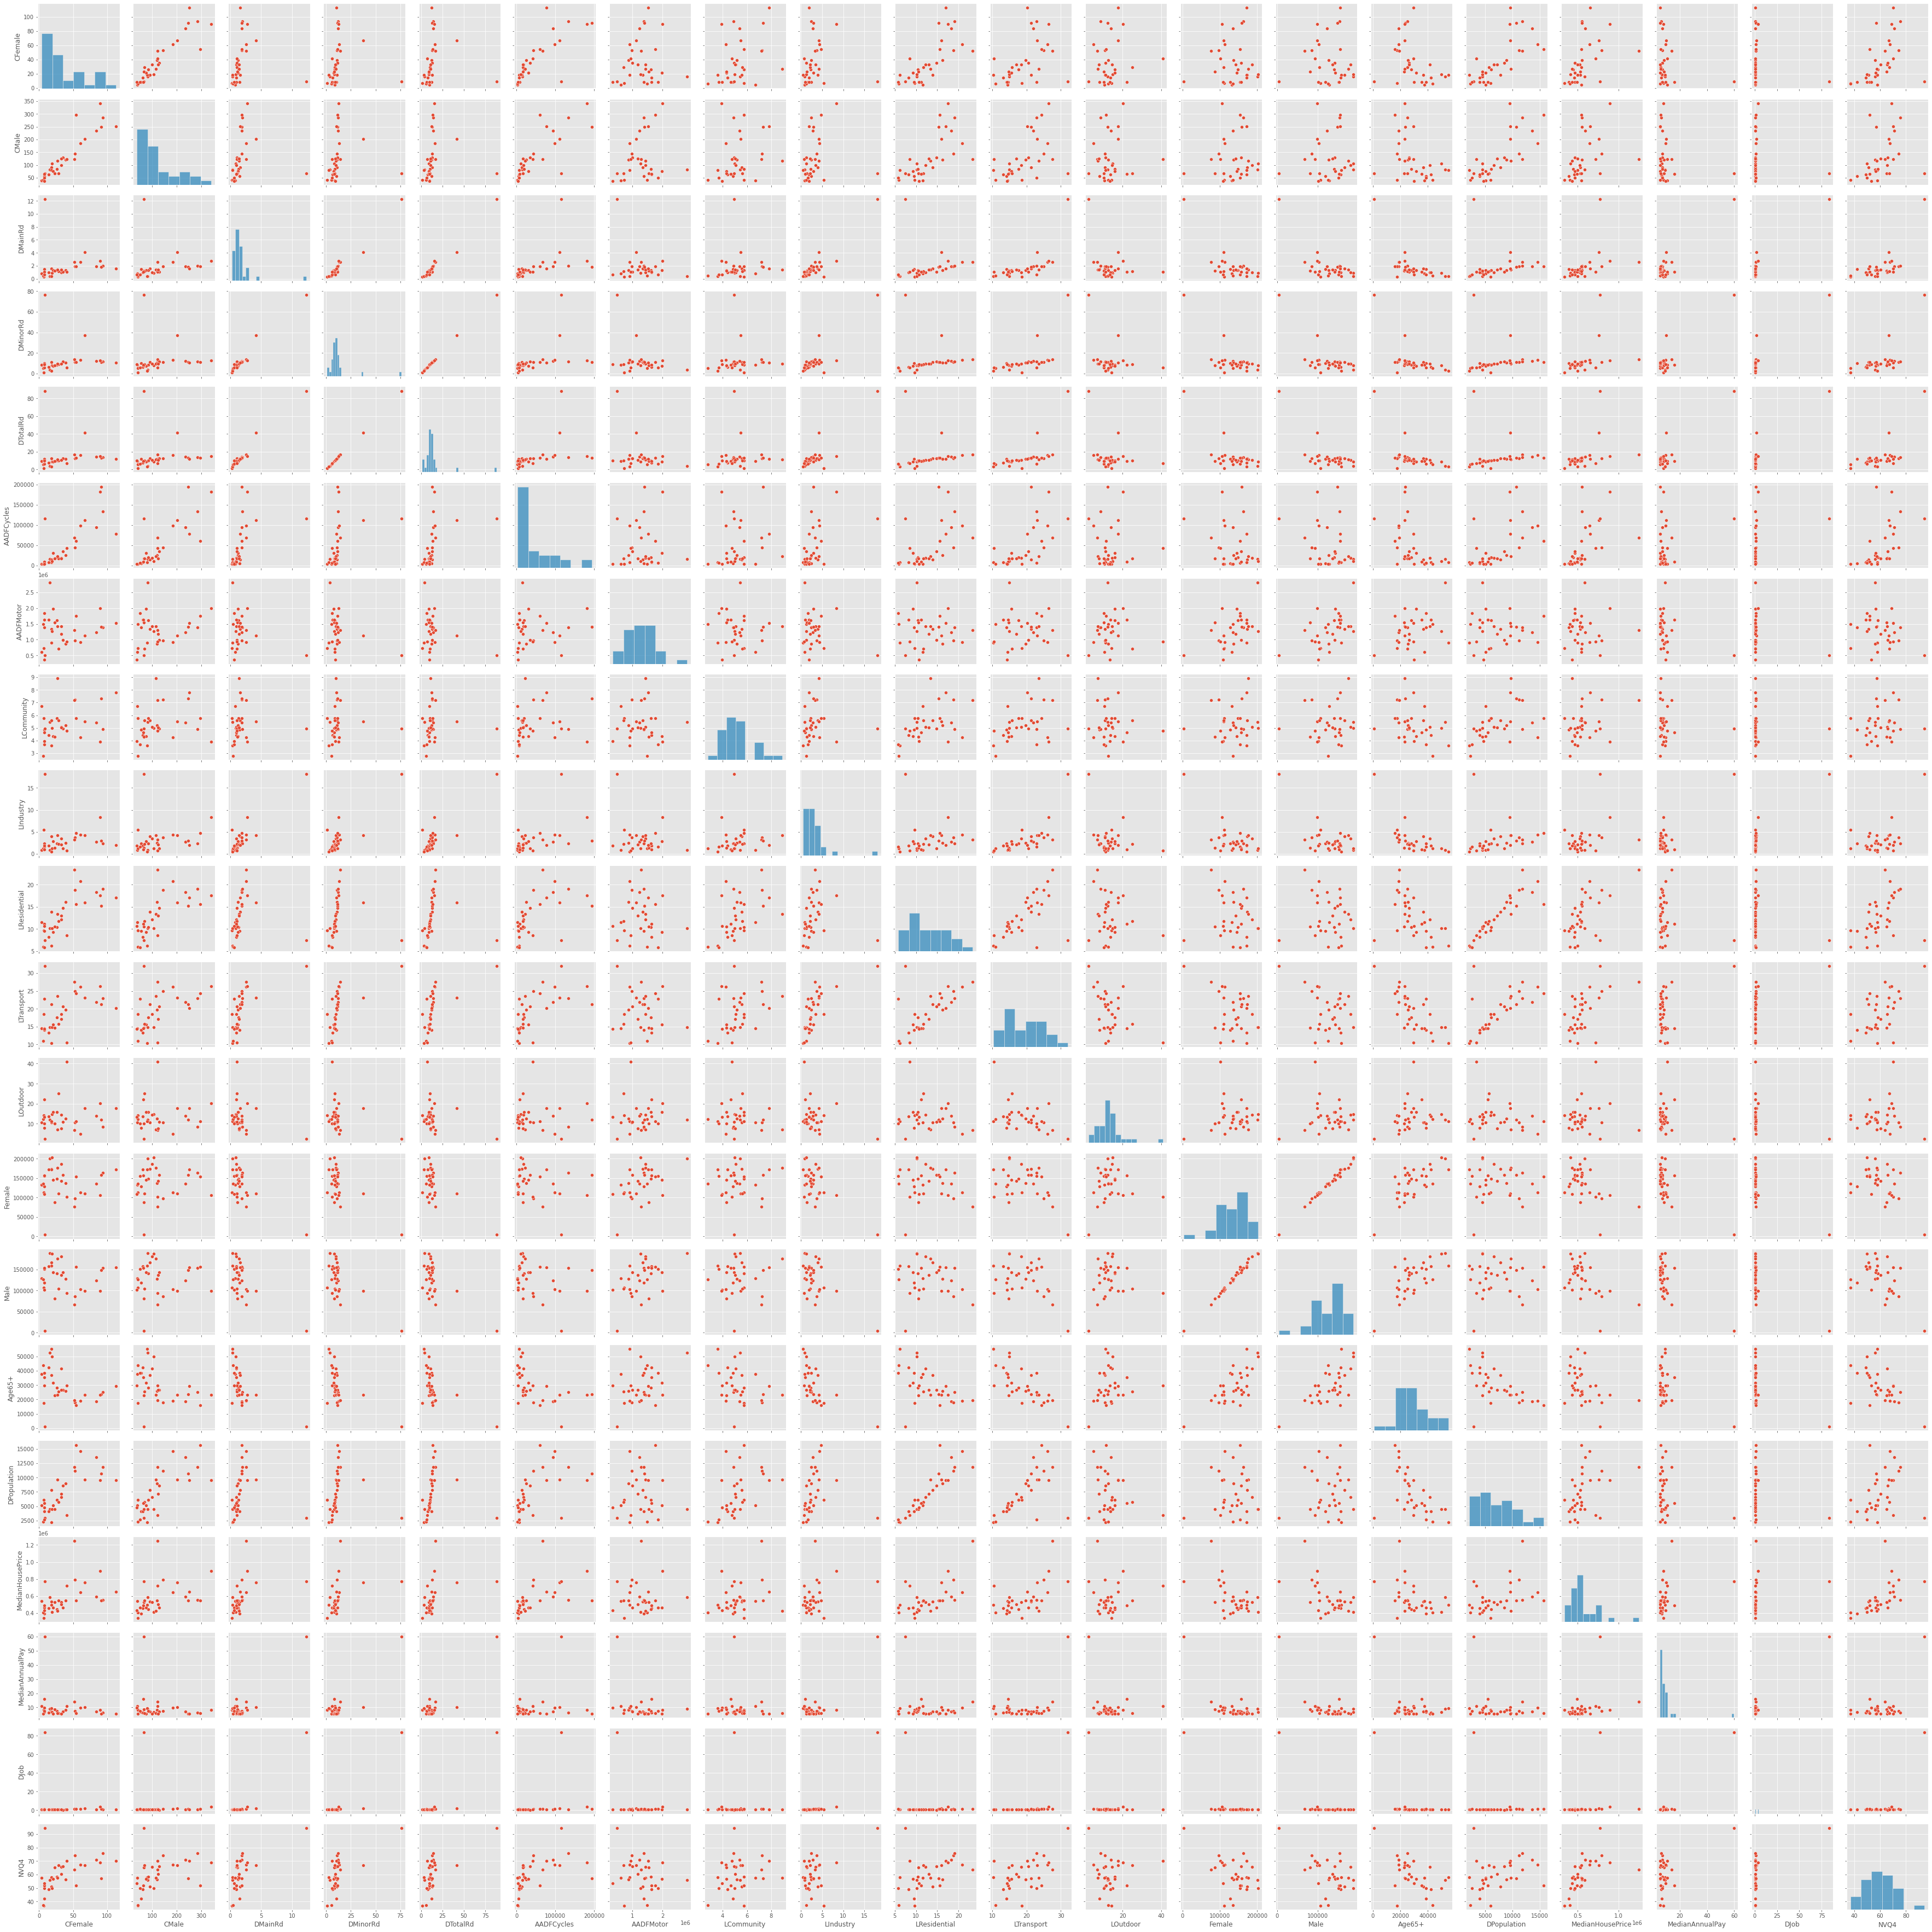

In [24]:
# Scatter plots
# sn.pairplot(df[['CFemale','CMale','DMainRd','DMinorRd','DTotalRd','AADFCycles','AADFMotor','LCommunity','LIndustry','LResidential',
'LTransport','LOutdoor','Female','Male','Age65+','DPopulation','MedianHousePrice','MedianAnnualPay','DJob','NVQ4']])
# plt.savefig("Pairplot.png")

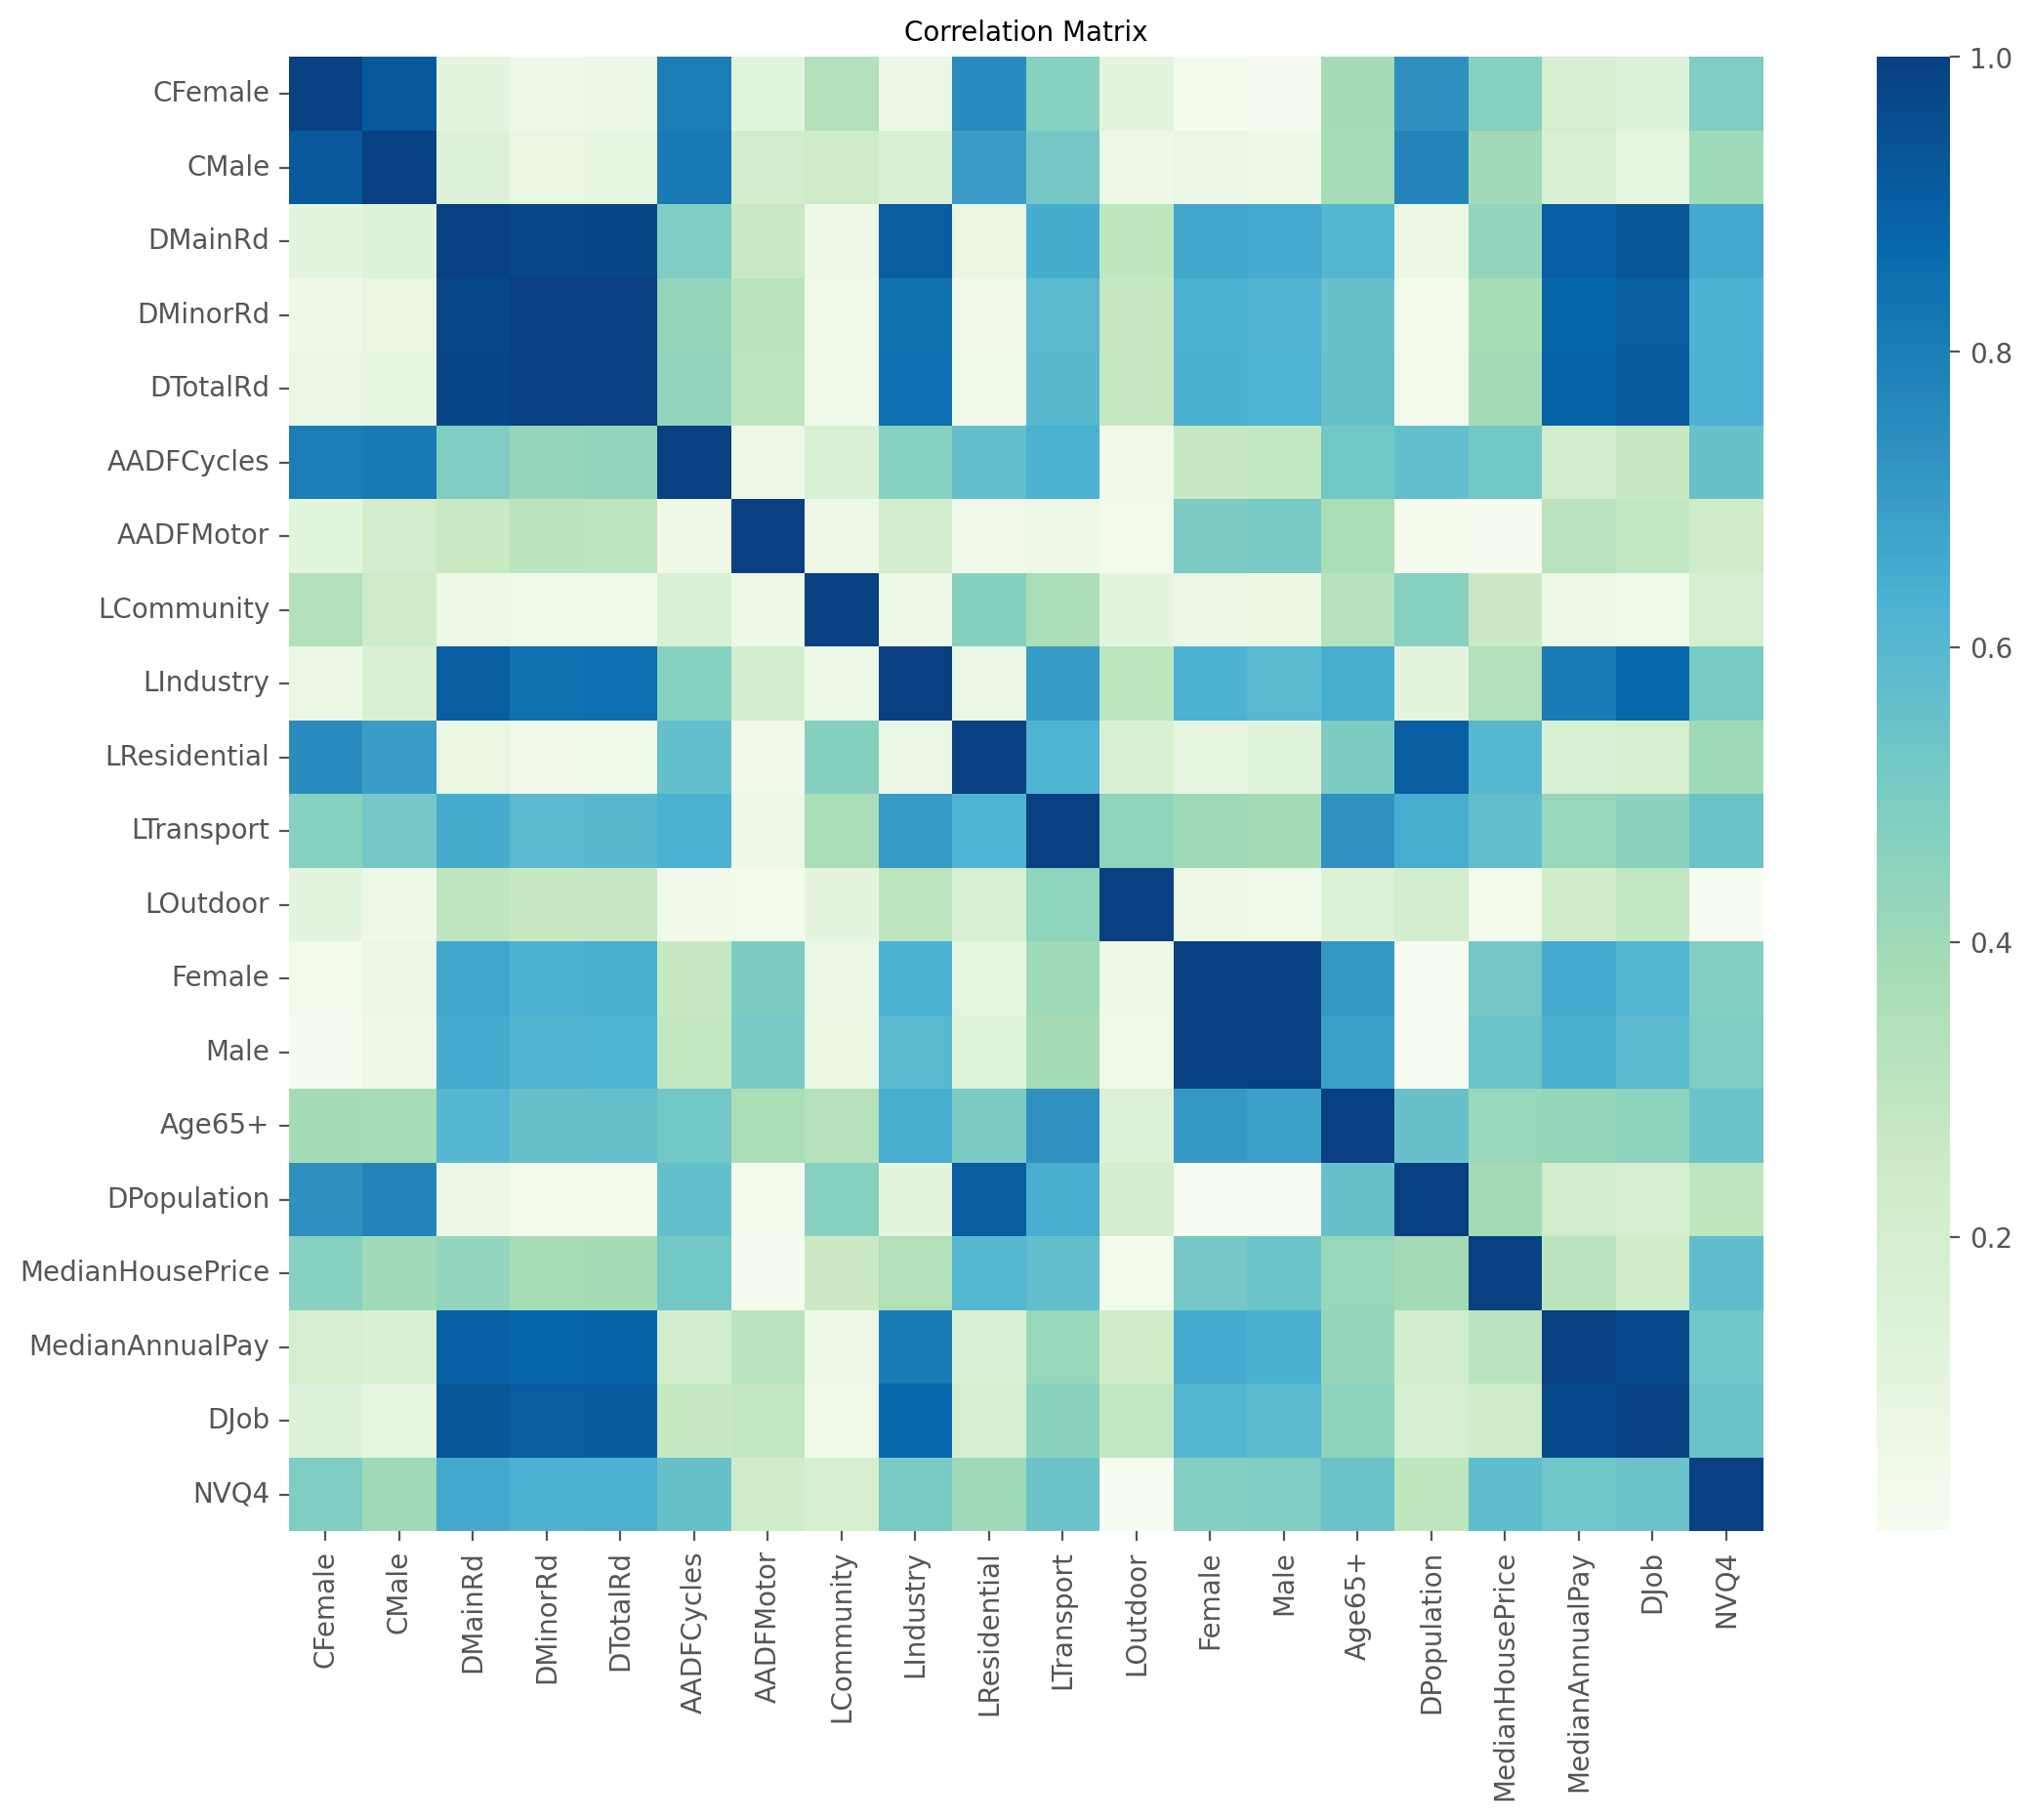

In [159]:
# Check the correlations
df_abs=df.corr().abs()
plt.figure(figsize=(15, 10),dpi=200)
plt.title('Correlation Matrix',fontdict={'fontsize':10})
sn.heatmap(df_abs, 
           cmap='GnBu',
           vmax=1,
           square=True)
plt.savefig("Correlation Matrix.png")

In [100]:
df.corr()

,CFemale,CMale,DMainRd,DMinorRd,DTotalRd,AADFCycles,AADFMotor,LCommunity,LIndustry,LResidential,LTransport,LOutdoor,Female,Male,Age65+,DPopulation,MedianHousePrice,MedianAnnualPay,DJob,NVQ4
CFemale,1.0000,0.9185,0.1051,0.0579,0.0633,0.8019,0.1190,0.3456,0.0658,0.7505,0.4676,0.1041,0.0219,-0.0159,-0.3863,0.7371,0.4618,-0.2031,-0.1422,0.4893
CMale,0.9185,1.0000,0.1432,0.0854,0.0924,0.8138,0.2175,0.2346,0.1692,0.6937,0.5182,0.0560,0.0672,0.0524,-0.3822,0.7738,0.3952,-0.1706,-0.0983,0.4022
DMainRd,0.1051,0.1432,1.0000,0.9773,0.9830,0.4886,-0.2641,0.0560,0.9048,0.0834,0.6463,-0.2902,-0.6656,-0.6532,-0.6067,0.0701,0.4340,0.9017,0.9325,0.6591
DMinorRd,0.0579,0.0854,0.9773,1.0000,0.9996,0.4272,-0.3112,0.0439,0.8446,0.0401,0.5900,-0.2723,-0.6263,-0.6168,-0.5513,0.0236,0.3754,0.8785,0.9028,0.6268
DTotalRd,0.0633,0.0924,0.9830,0.9996,1.0000,0.4359,-0.3046,0.0444,0.8550,0.0446,0.5984,-0.2758,-0.6333,-0.6233,-0.5594,0.0286,0.3835,0.8841,0.9095,0.6316
AADFCycles,0.8019,0.8138,0.4886,0.4272,0.4359,1.0000,0.0532,0.1742,0.4683,0.5650,0.6321,-0.0379,-0.2736,-0.2889,-0.5245,0.5653,0.5212,0.2148,0.2699,0.5562
AADFMotor,0.1190,0.2175,-0.2641,-0.3112,-0.3046,0.0532,1.0000,-0.0546,-0.2081,-0.0412,-0.0566,0.0305,0.4986,0.5113,0.3639,0.0199,-0.0158,-0.3205,-0.2820,-0.2314
LCommunity,0.3456,0.2346,0.0560,0.0439,0.0444,0.1742,-0.0546,1.0000,0.0563,0.4710,0.3642,-0.1064,0.0725,0.0780,-0.3305,0.4623,0.2562,-0.0565,-0.0487,0.1926
LIndustry,0.0658,0.1692,0.9048,0.8446,0.8550,0.4683,-0.2081,0.0563,1.0000,0.0675,0.7011,-0.3040,-0.6258,-0.5953,-0.6424,0.1071,0.3465,0.8067,0.8722,0.5051
LResidential,0.7505,0.6937,0.0834,0.0401,0.0446,0.5650,-0.0412,0.4710,0.0675,1.0000,0.6236,-0.1781,-0.1002,-0.1272,-0.4965,0.9055,0.6028,-0.1740,-0.1972,0.4021


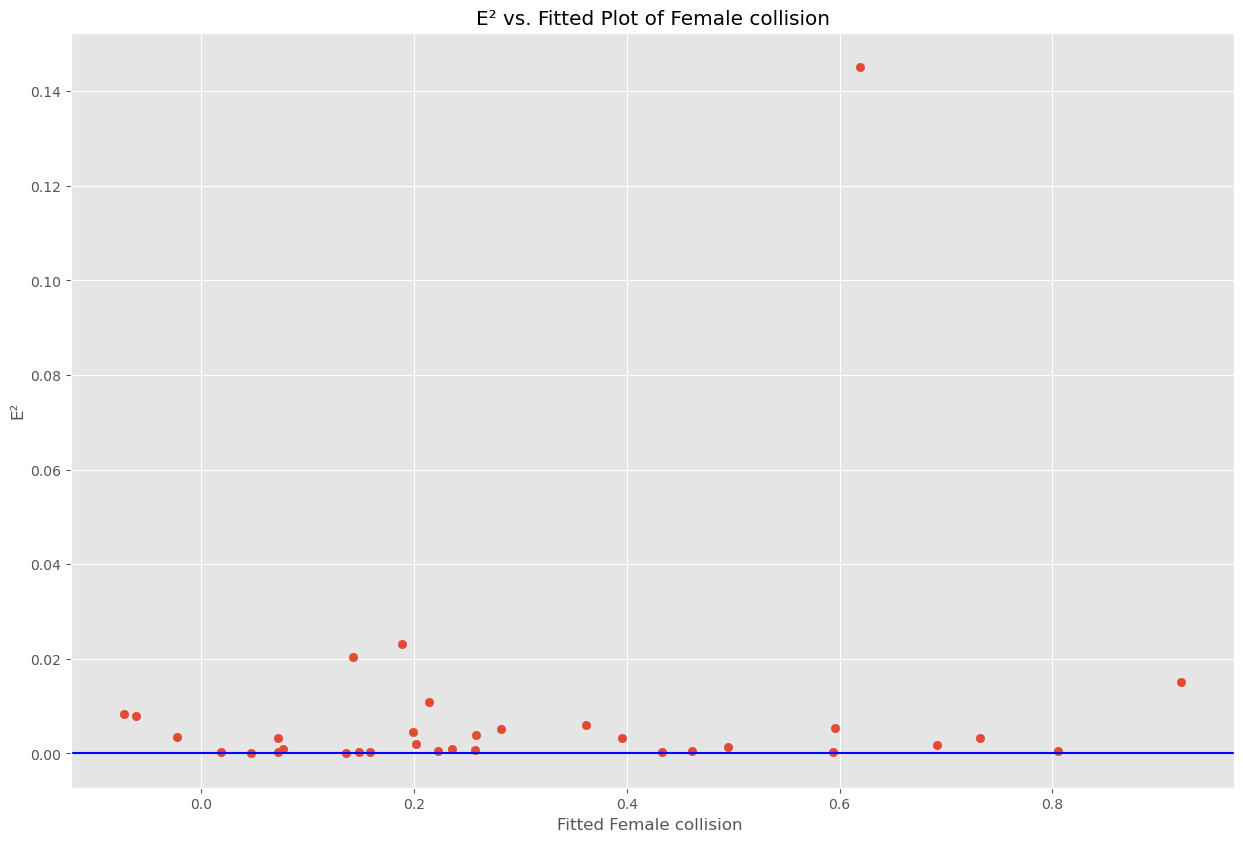

<Figure size 432x288 with 0 Axes>

In [219]:
# Heteroscedasticity detection
# Graphical test

model_res = sm.formula.ols('CFemale ~ AADFCycles + AADFMotor + LCommunity + LIndustry + LOutdoor + Male + DPopulation + MedianHousePrice + NVQ4', df_minmax).fit()

res = model_res.resid
fitted = model_res.fittedvalues
e2 = res**2

plt.figure(figsize=(15, 10),dpi=100)
plt.scatter(fitted, e2)

# adding title and labels
plt.xlabel('Fitted Female collision ')
plt.ylabel('E²')
plt.title('E² vs. Fitted Plot of Female collision')

plt.axhline(y = 0.0, color = 'b',linestyle = '-')
plt.show()
plt.savefig("E²_vs_Fitted_Plot_of_Female_collision.png")

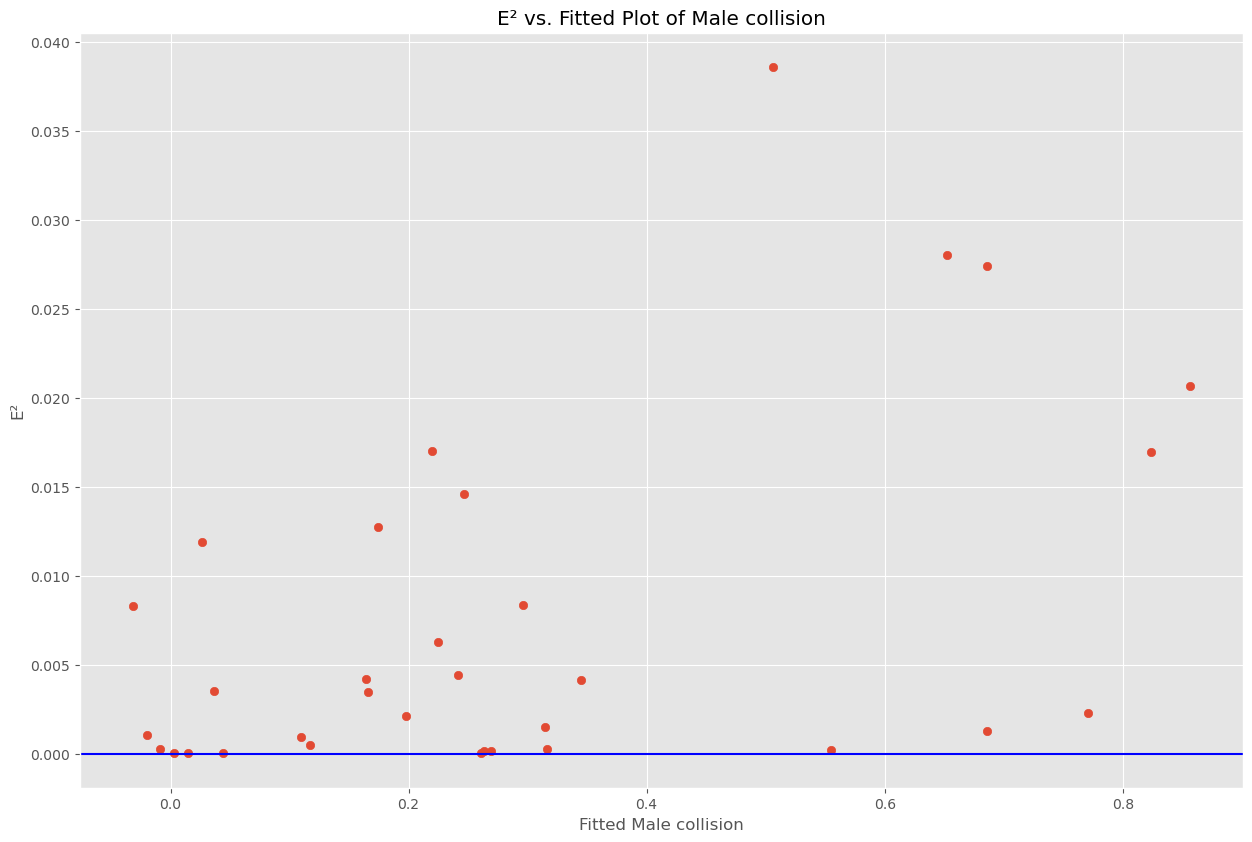

<Figure size 432x288 with 0 Axes>

In [218]:
# Graphical test

model_res = sm.formula.ols('CMale ~ AADFCycles + AADFMotor + LCommunity + LIndustry + LOutdoor + Male + DPopulation + MedianHousePrice + NVQ4', df_minmax).fit()

res = model_res.resid
fitted = model_res.fittedvalues
e2 = res**2

plt.figure(figsize=(15, 10),dpi=100)

plt.scatter(fitted, e2)
# adding title and labels
plt.xlabel('Fitted Male collision')
plt.ylabel('E²')
plt.title('E² vs. Fitted Plot of Male collision')

plt.axhline(y = 0.0, color = 'b',linestyle = '-')
plt.show()
plt.savefig("E²_vs_Fitted_Plot_of_Male_collision.png")

In [109]:
df_demo = df.drop(['Code','Name','CFemale','CMale'],axis=1)

In [160]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DMainRd           33 non-null     float64
 1   DMinorRd          33 non-null     float64
 2   DTotalRd          33 non-null     float64
 3   AADFCycles        33 non-null     int64  
 4   AADFMotor         33 non-null     int64  
 5   LCommunity        33 non-null     float64
 6   LIndustry         33 non-null     float64
 7   LResidential      33 non-null     float64
 8   LTransport        33 non-null     float64
 9   LOutdoor          33 non-null     float64
 10  Female            33 non-null     int64  
 11  Male              33 non-null     int64  
 12  Age65+            33 non-null     int64  
 13  DPopulation       33 non-null     float64
 14  MedianHousePrice  33 non-null     int64  
 15  MedianAnnualPay   33 non-null     float64
 16  DJob              33 non-null     float64
 17 

In [166]:
# Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

df_check = df_demo[list(df_demo)]
df_with_const = add_constant(df_check)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
DMainRd,"4,429.4654"
DMinorRd,"137,350.0488"
DTotalRd,"185,838.6324"
AADFCycles,3.4239
AADFMotor,3.0364
LCommunity,2.4294
LIndustry,19.9250
LResidential,21.9552
LTransport,12.6437
LOutdoor,3.7462


In [164]:
# Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

df_check = df_minmax[list(df_minmax)]
df_with_const = add_constant(df_check)

vif_df_mm = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df_mm = vif_df_mm.drop('const')
vif_df_mm

,VIF
CFemale,25.1887
CMale,20.4758
DMainRd,"4,626.0065"
DMinorRd,"143,845.8082"
DTotalRd,"194,597.8553"
AADFCycles,8.1451
AADFMotor,3.0856
LCommunity,2.8613
LIndustry,21.2458
LResidential,23.2256


In [166]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly 
    the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [168]:
df_new = drop_column_using_vif_(df.drop(['Code','Name','CFemale','CMale'],axis=1))

Dropping: DTotalRd
Dropping: Female
Dropping: DMainRd
Dropping: DJob
Dropping: Age65+
Dropping: LResidential
Dropping: MedianAnnualPay
Dropping: LTransport
Dropping: DMinorRd


In [169]:
df_mm_new = drop_column_using_vif_(df_minmax.drop(['CFemale','CMale'],axis=1))

Dropping: DTotalRd
Dropping: Female
Dropping: DMainRd
Dropping: DJob
Dropping: Age65+
Dropping: LResidential
Dropping: MedianAnnualPay
Dropping: LTransport
Dropping: DMinorRd


In [169]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AADFCycles        33 non-null     int64  
 1   AADFMotor         33 non-null     int64  
 2   LCommunity        33 non-null     float64
 3   LIndustry         33 non-null     float64
 4   LOutdoor          33 non-null     float64
 5   Male              33 non-null     int64  
 6   DPopulation       33 non-null     float64
 7   MedianHousePrice  33 non-null     int64  
 8   NVQ4              33 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 2.4 KB


In [170]:
# Check VIF again
df_with_const = add_constant(df_new)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
AADFCycles,2.5848
AADFMotor,1.8752
LCommunity,1.4663
LIndustry,2.4387
LOutdoor,1.3152
Male,3.6747
DPopulation,2.2558
MedianHousePrice,2.7659
NVQ4,2.0923


In [171]:
df_drop = df.drop(['DTotalRd','Female','DMainRd','DJob','Age65+','LResidential','MedianAnnualPay','LTransport','DMinorRd'],axis=1)

In [172]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              33 non-null     object 
 1   Name              33 non-null     object 
 2   CFemale           33 non-null     int64  
 3   CMale             33 non-null     int64  
 4   AADFCycles        33 non-null     int64  
 5   AADFMotor         33 non-null     int64  
 6   LCommunity        33 non-null     float64
 7   LIndustry         33 non-null     float64
 8   LOutdoor          33 non-null     float64
 9   Male              33 non-null     int64  
 10  DPopulation       33 non-null     float64
 11  MedianHousePrice  33 non-null     int64  
 12  NVQ4              33 non-null     float64
dtypes: float64(5), int64(6), object(2)
memory usage: 3.5+ KB


In [188]:
# Checking the correlation between variables(OLS)
# build the model Female, using this equation to formalute the regression model
model_CFemale = sm.formula.ols('CFemale ~ AADFCycles + AADFMotor + LCommunity + LIndustry + LOutdoor + Male + DPopulation + MedianHousePrice + NVQ4', df_minmax).fit()
model_CFemale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CFemale   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     19.83
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.07e-09
Time:                        17:57:27   Log-Likelihood:                 31.893
No. Observations:                  33   AIC:                            -43.79
Df Residuals:                      23   BIC:                            -28.82
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1749      0.137     -1.277      0.214      -0.458       0.108
AADFCycles           0.6601      0.115      5.748      0.000       0.423       0.898
AADFMotor            0.0442      0.133      0.333      0.742      -0.231       0.319
LCommunity           0.0833      0.111      0.753      0.459      -0.145       0.312
LIndustry           -0.4743      0.170     -2.785      0.011      -0.827      -0.122
LOutdoor             0.1713      0.126      1.358      0.188      -0.090       0.432
Male                 0.0813      0.177      0.459      0.650      -0.285       0.448
DPopulation          0.3421      0.108      3.177      0.004       0.119       0.565
MedianHousePrice    -0.0180      0.168     -0.107      0.915      -0.365       0.329
NVQ4                 0.2947      0.139      2.118      0.045       0.007       0.583
==============================================================================
Omnibus:                       28.759   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.613
Skew:                           1.825   Prob(JB):                     1.40e-17
Kurtosis:                       9.567   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_drop.loc[:,['AADFCycles','AADFMotor','LCommunity','LIndustry','LOutdoor','Male','DPopulation','MedianHousePrice','NVQ4']], df_drop.CFemale)

# The coefficients
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)

Coefficients: 
 [ 3.75730907e-04  1.96595279e-06  1.48539503e+00 -2.94216273e+00
  4.83892998e-01  4.82261799e-05  2.76142899e-03 -2.15374514e-06
  5.59699368e-01]
Intercept: 
 -46.99193479077149


In [189]:
# Checking the correlation between variables(OLS)
# build the model Male, using this equation to formalute the regression model
model_CMale = sm.formula.ols('CMale ~ AADFCycles + AADFMotor + LCommunity + LIndustry + LOutdoor + Male + DPopulation + MedianHousePrice + NVQ4', df_minmax).fit()
model_CMale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMale   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     23.04
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.82e-09
Time:                        17:57:30   Log-Likelihood:                 34.331
No. Observations:                  33   AIC:                            -48.66
Df Residuals:                      23   BIC:                            -33.70
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3385      0.127     -2.661      0.014      -0.602      -0.075
AADFCycles           0.5535      0.107      5.190      0.000       0.333       0.774
AADFMotor            0.1005      0.123      0.814      0.424      -0.155       0.356
LCommunity          -0.1498      0.103     -1.459      0.158      -0.362       0.063
LIndustry            0.0374      0.158      0.237      0.815      -0.290       0.365
LOutdoor             0.2636      0.117      2.250      0.034       0.021       0.506
Male                 0.2977      0.165      1.809      0.083      -0.043       0.638
DPopulation          0.5308      0.100      5.306      0.000       0.324       0.738
MedianHousePrice    -0.0023      0.156     -0.015      0.988      -0.324       0.320
NVQ4                 0.1110      0.129      0.859      0.399      -0.156       0.378
==============================================================================
Omnibus:                        0.626   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.568
Skew:                           0.293   Prob(JB):                        0.753
Kurtosis:                       2.735   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_drop.loc[:,['AADFCycles','AADFMotor','LCommunity','LIndustry','LOutdoor','Male','DPopulation','MedianHousePrice','NVQ4']], df_drop.CMale)

# The coefficients
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)

Coefficients: 
 [ 8.75811942e-04  1.24122072e-05 -7.42847877e+00  6.45820469e-01
  2.07048696e+00  4.90725931e-04  1.19091180e-02 -7.70015461e-07
  5.85867252e-01]
Intercept: 
 -106.20551360409188


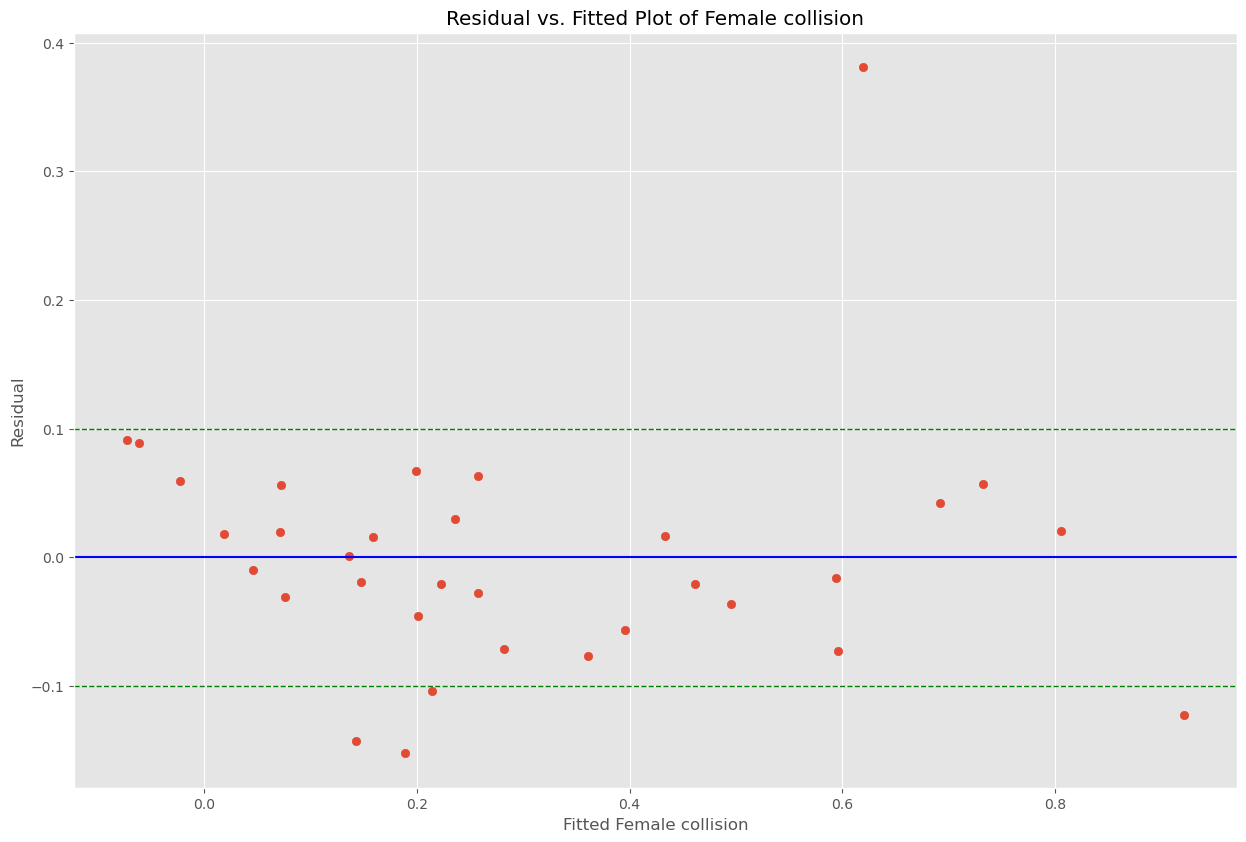

<Figure size 432x288 with 0 Axes>

In [221]:
# Residual analysis
plt.figure(figsize=(15, 10),dpi=100)
plt.scatter(model_CFemale.fittedvalues, model_CFemale.resid)
# adding title and labels
plt.xlabel('Fitted Female collision')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Female collision')

plt.axhline(y = 0, color = 'b',linestyle = '-')
plt.axhline(y = 0.1, color = 'g',linestyle = '--',linewidth = 1)
plt.axhline(y = -0.1, color = 'g',linestyle = '--',linewidth = 1)
plt.show()

plt.savefig("Res_vs_fit_Female_collision.png")

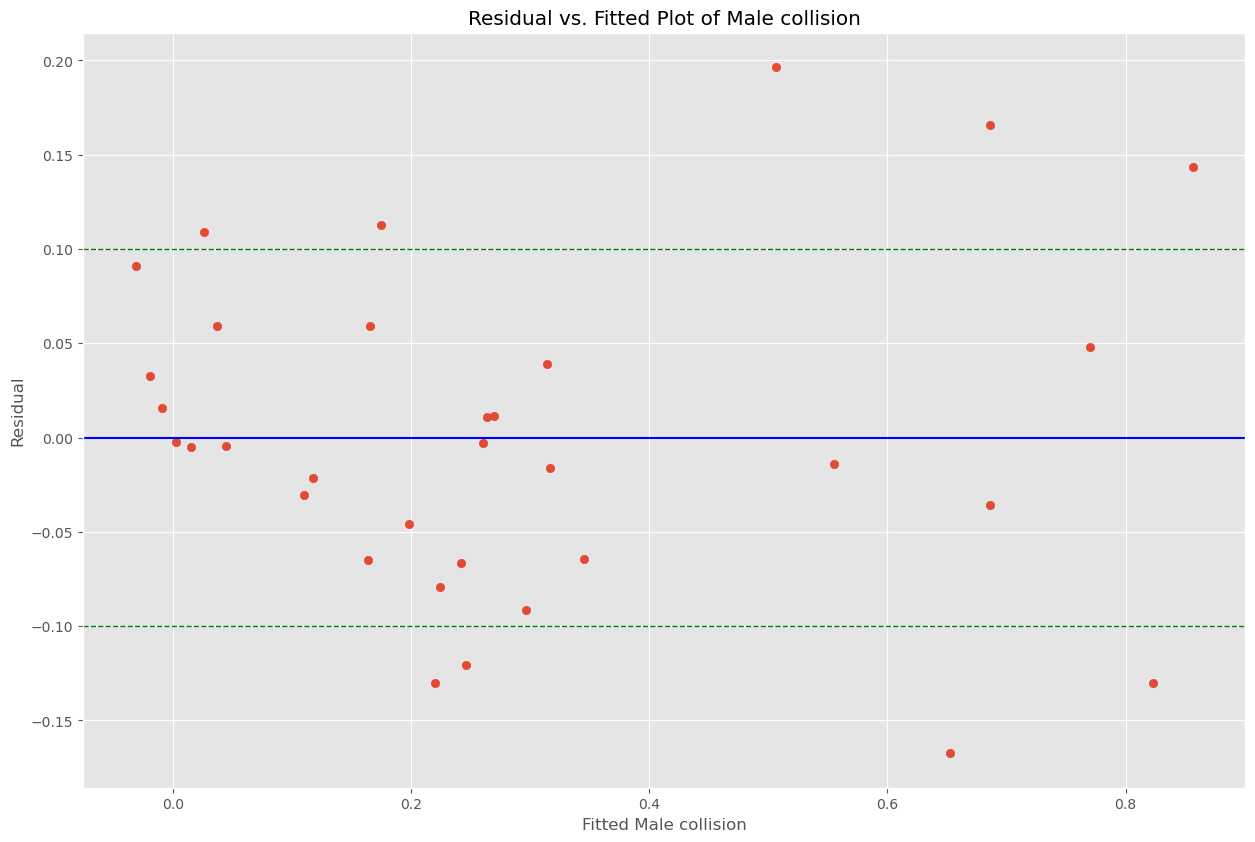

<Figure size 432x288 with 0 Axes>

In [223]:
plt.figure(figsize=(15, 10),dpi=100)
plt.scatter(model_CMale.fittedvalues, model_CMale.resid)
# adding title and labels
plt.xlabel('Fitted Male collision')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Male collision')

plt.axhline(y = 0, color = 'b',linestyle = '-')
plt.axhline(y = 0.1, color = 'g',linestyle = '--',linewidth = 1)
plt.axhline(y = -0.1, color = 'g',linestyle = '--',linewidth = 1)
plt.show()
plt.savefig("Res_vs_fit_Male_collision.png")